<a href="https://colab.research.google.com/github/ashish78905/OPTICONNECT_CALLL_CENTER_ANALYSIS-ASSIGNMENT/blob/main/COMPLETE_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libararies and seeing the overview of the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/googleplaystore (1).csv')
df

In [ ]:
display(df.head())

In [ ]:
display(df.tail())

In [ ]:
display(df.shape)

In [ ]:
display(df.info())



In [ ]:
display(df.columns)

In [ ]:
display(df.dtypes)

#Handaling Duplicates values

In [ ]:
display(df.duplicated().sum())

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.duplicated().sum())

#making the column easily acessiable

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
display(df.columns)

# converting the numerical column to the correct data type

In [ ]:
df.Size.unique() # use this to see the nuumber of unquie values and unwanted things to remove
df[~df['Reviews'].str.isnumeric()]# if the there are just number but just very fews rows can not be seen online ,use this to see exact that rows

In [ ]:

df['reviews'] = pd.to_numeric(df['reviews'])

# Clean and convert 'installs'
# Check if 'installs' is of object/string type before using .str
if df['installs'].dtype == 'object':
    df['installs'] = df['installs'].str.replace('[+,]', '', regex=True)
    df['installs'] = pd.to_numeric(df['installs'])
else:
    # If not object, try direct numeric conversion
    df['installs'] = pd.to_numeric(df['installs'], errors='coerce')


# Clean and convert 'price'
# Check if 'price' is of object/string type before using .str
if df['price'].dtype == 'object':
    df['price'] = df['price'].str.replace('$', '', regex=False)
    df['price'] = pd.to_numeric(df['price'])
else:
    # If not object, try direct numeric conversion
     df['price'] = pd.to_numeric(df['price'], errors='coerce')


display(df.dtypes)

In [ ]:
# Convert 'size' column separately due to 'M', 'k', and 'varies with device'
def clean_size(size):
    if size == 'varies with device':
        return np.nan
    size = str(size).replace(',', '') # Convert to string before replacing
    if 'M' in size:
        return float(size.replace('M', '')) * 1024 * 1024 # Convert MB to bytes
    elif 'k' in size:
        return float(size.replace('k', '')) * 1024 # Convert KB to bytes
    return np.nan # Handle any other unexpected formats

In [ ]:
# Convert 'last_updated' to datetime
if df['last_updated'].dtype == 'object':
    df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')

In [ ]:
df['year'] = df['last_updated'].dt.year
df['month'] = df['last_updated'].dt.month
df['day'] = df['last_updated'].dt.day

df.drop('last_updated', axis=1, inplace=True)

#Storing the numerical and the categorical column in seprate variable

In [ ]:
# Manually identify and list the numerical columns
numerical_cols = ['rating', 'reviews', 'size', 'installs', 'price', 'year', 'month', 'day']

display(numerical_cols)

In [ ]:
# Manually identify and list the categorical columns
categorical_cols = ['app', 'category', 'type', 'content_rating', 'genres']

display(categorical_cols)

# now lets go towards the the unvarient analysis of numerical column

In [ ]:
# Seaborn Plotting Cheatsheet
# A guide to the general syntax for common plots.

import seaborn as sns
import pandas as pd

# In all examples, assume 'df' is your pre-existing DataFrame.

# --- Univariate Plots (Visualizing a single variable) ---

# 1. Histogram: Shows the distribution of a single numerical variable.
# Use for: Seeing the shape, center, and spread of your data.
sns.histplot(data=df, x='numerical_variable', kde=True)

# 2. Count Plot: Shows the frequency of each category in a single categorical variable.
# Use for: Counting occurrences in categories.
sns.countplot(data=df, x='categorical_variable')


# --- Bivariate Plots (Visualizing relationships between two variables) ---

# 3. Scatter Plot: Shows the relationship between two numerical variables.
# Use for: Identifying correlations and patterns between two numerical variables.
sns.scatterplot(data=df, x='x_numerical_variable', y='y_numerical_variable', hue='optional_categorical_hue')

# 4. Bar Plot: Shows an aggregate (default is mean) of a numerical variable across categories.
# Use for: Comparing a numerical measure across different groups.
sns.barplot(data=df, x='categorical_variable', y='numerical_variable')

# 5. Box Plot: Shows the five-number summary (min, Q1, median, Q3, max) of a numerical variable across categories.
# Use for: Comparing distributions and identifying outliers between groups.
sns.boxplot(data=df, x='categorical_variable', y='numerical_variable')

# 6. Violin Plot: Combines a box plot with the probability density of the data.
# Use for: Comparing distributions in more detail than a box plot.
sns.violinplot(data=df, x='categorical_variable', y='numerical_variable')

# 7. Swarm Plot: A scatter plot for categorical data where points don't overlap.
# Use for: Visualizing the actual data points in a distribution (best for smaller datasets).
sns.swarmplot(data=df, x='categorical_variable', y='numerical_variable')

# 8. Boxen Plot: An enhanced box plot for larger datasets, showing more quantiles.
# Use for: Getting a more detailed look at a distribution's shape.
sns.boxenplot(data=df, x='categorical_variable', y='numerical_variable')


# --- Multivariate Plots (Visualizing more than two variables) ---

# 9. Heatmap: Visualizes a matrix of data where values are represented as colors.
# Use for: Showing correlations between many variables at once.
# Note: You typically need to calculate a correlation matrix first.
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

# 10. lmplot (Regression Plot): A scatter plot with a fitted linear regression line.
# Use for: Visualizing the linear relationship between two variables, optionally separated by category.
sns.lmplot(data=df, x='x_numerical_variable', y='y_numerical_variable', hue='optional_categorical_hue')



### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by addressing the following:

Describe the 'Normal' (The Main Peak): Pinpoint the most common range where the data is concentrated. Explain this as the typical behavior, value, or outcome for a user, product, or event.

Explain the Variety (The Spread): Comment on the full range of the data, from its minimum to maximum value. Use this to describe whether the data is very consistent (narrow spread) or highly diverse (wide spread).

Point Out Special Groups (The Extremes): Highlight any significant outliers (unusually high or low values) or note if the data forms distinct groups (multiple peaks). Frame these as unique segments, such as "power users," "budget-conscious customers," or different operational modes.

### Technical Analysis (For Modeling) 🔬
For a technical audience, document the key statistical properties:

Shape & Skewness: State clearly if the distribution is symmetric, positively skewed (right tail), or negatively skewed (left tail). Note its conformance to or deviation from a normal distribution.

Outliers: Identify the presence and location (lower, upper, or both ends) of potential outliers. Characterize them as high-leverage points that could influence model parameters and performance.

Modality: Specify if the distribution is unimodal (one peak), bimodal (two peaks), or multimodal. If it's not unimodal, identify the approximate centers of each peak, as this indicates the presence of distinct sub-populations.



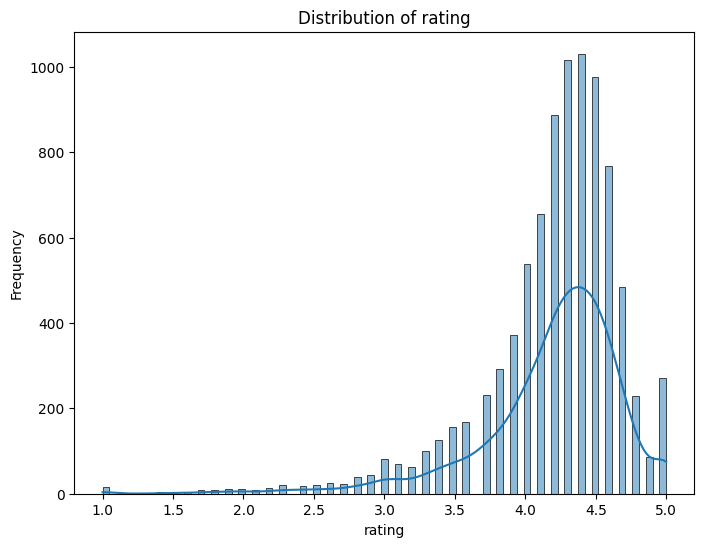

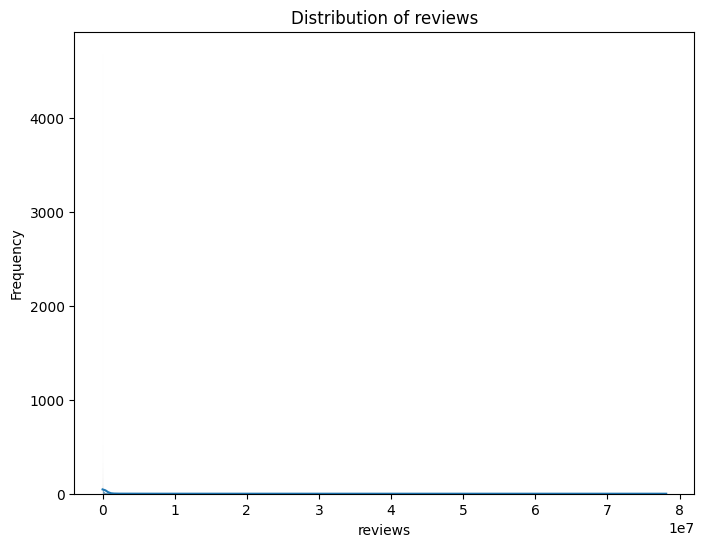

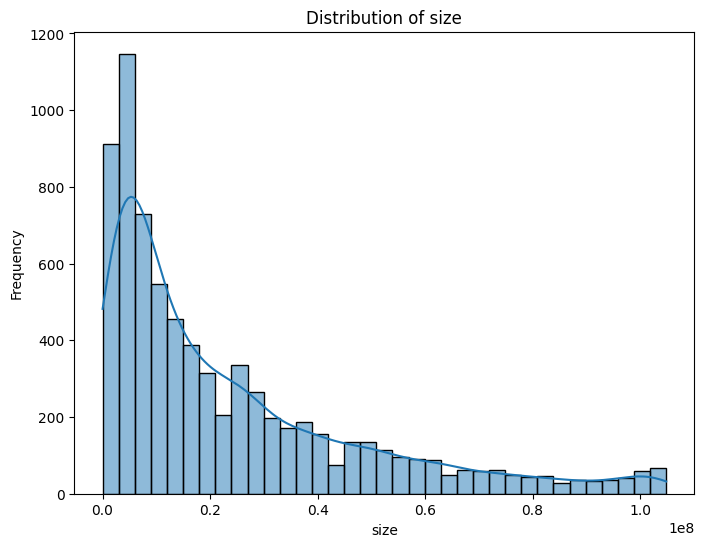

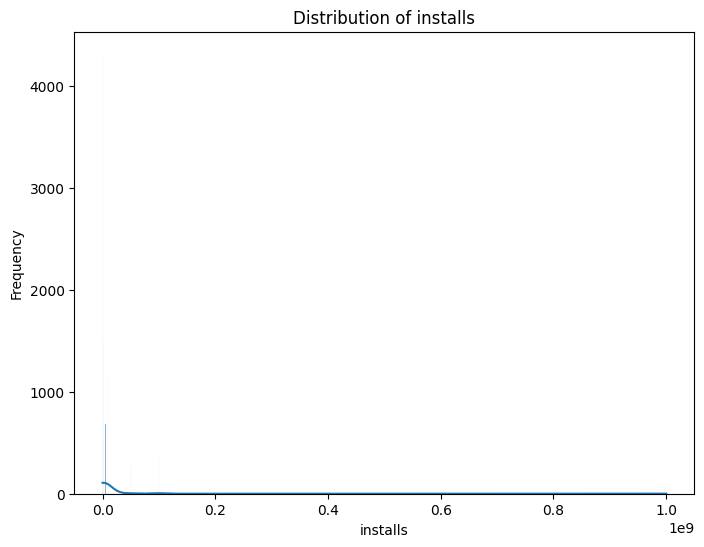

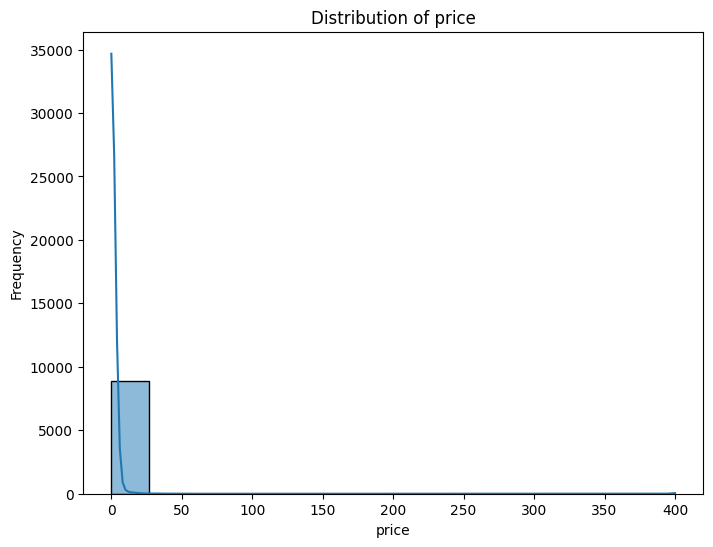

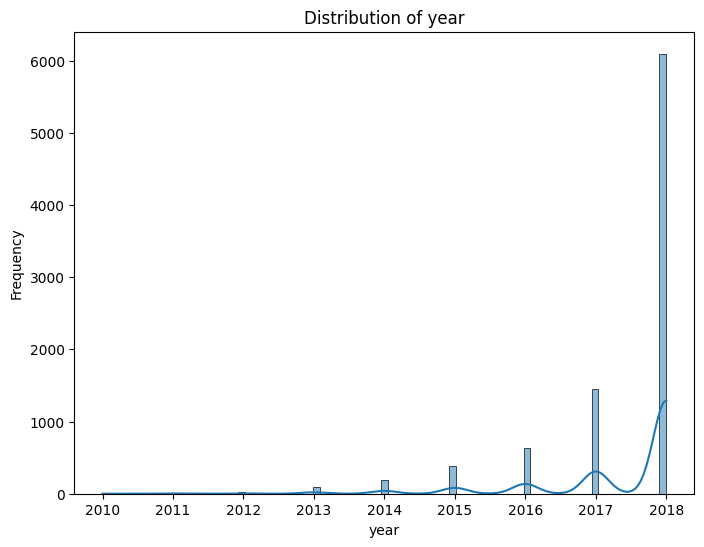

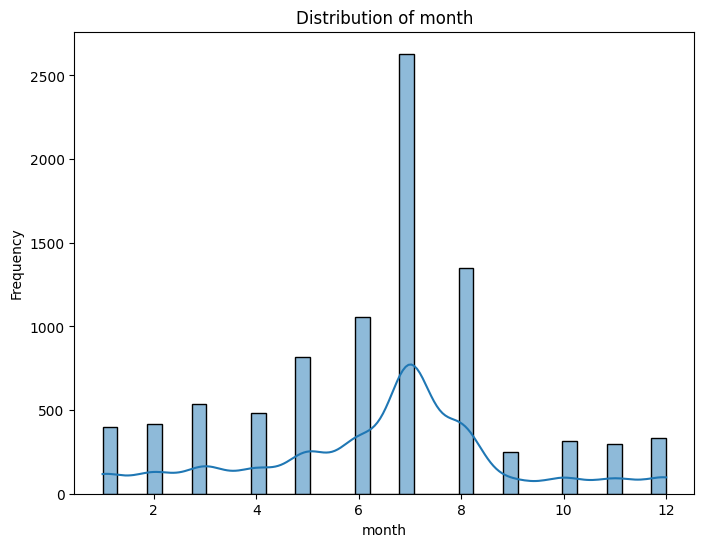

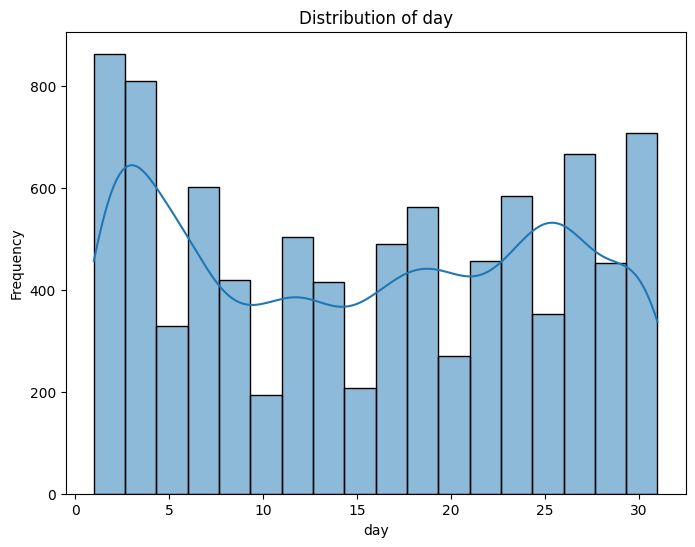

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by addressing the following:

Describe the 'Core' Group (The Box): Focus on the central box. This represents the middle 50% of all data—the most common outcomes. The line inside the box (the median) is the true middle value; half the data is above this point and half is below.

Explain the Expected Range (The Whiskers): Look at the lines (whiskers) extending from the box. They show the full, expected range of "normal" data. Long whiskers suggest high variety, while short whiskers mean most results are very consistent.

Point Out Exceptions (The Dots): Any dots plotted outside the whiskers are outliers. These are extreme or unusual cases that fall outside the normal range. Frame them as special cases worth investigating, like "top-performing sales," "fraudulent transactions," or "system failures."

### Technical Analysis (For Modeling) 🔬
For a technical audience, document the key statistical properties:

Central Tendency & Spread: State the median (Q2) as the robust measure of central tendency. Report the Interquartile Range (IQR = Q3 - Q1), represented by the box's height, as the primary measure of spread.

Skewness: Assess the plot's asymmetry. A distribution is positively skewed (right-skewed) if the median is closer to the bottom of the box (Q1) and the upper whisker is longer. It's negatively skewed (left-skewed) if the median is closer to the top of the box (Q3) and the lower whisker is longer.

Outliers: Explicitly note the presence and location of data points plotted beyond the whiskers. These are statistically defined as values outside the Q1 - 1.5*IQR and Q3 + 1.5*IQR boundaries and should be investigated before modeling.

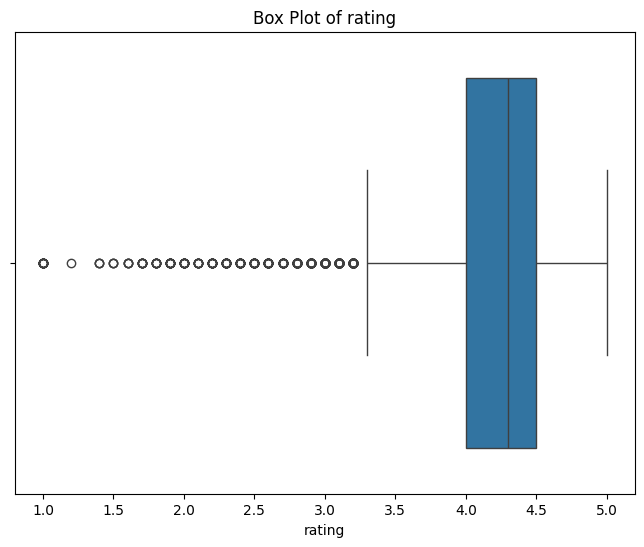

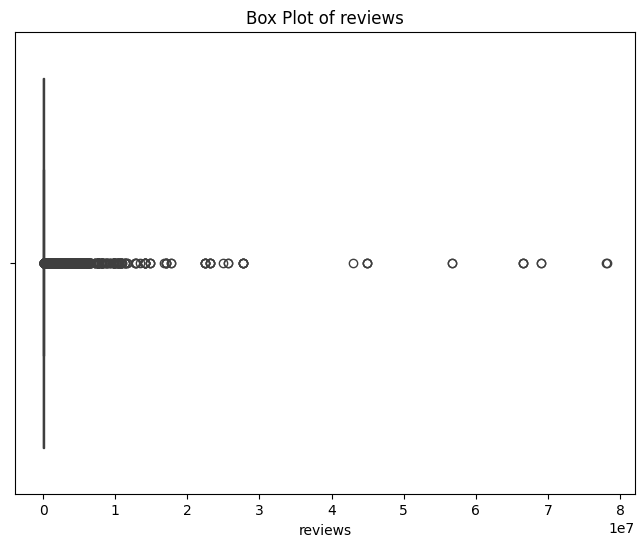

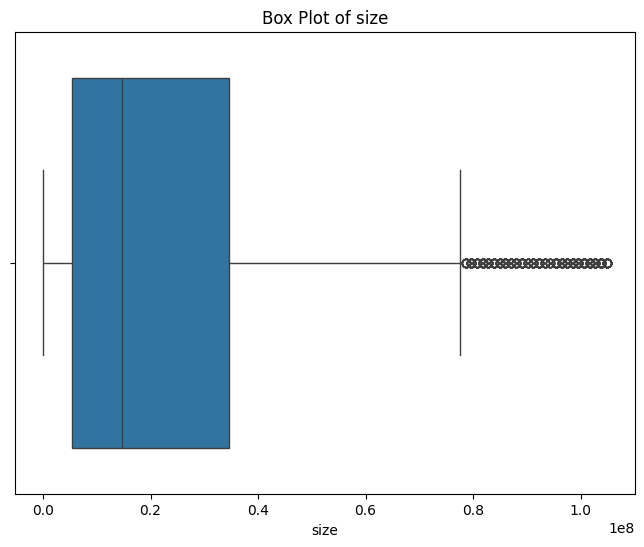

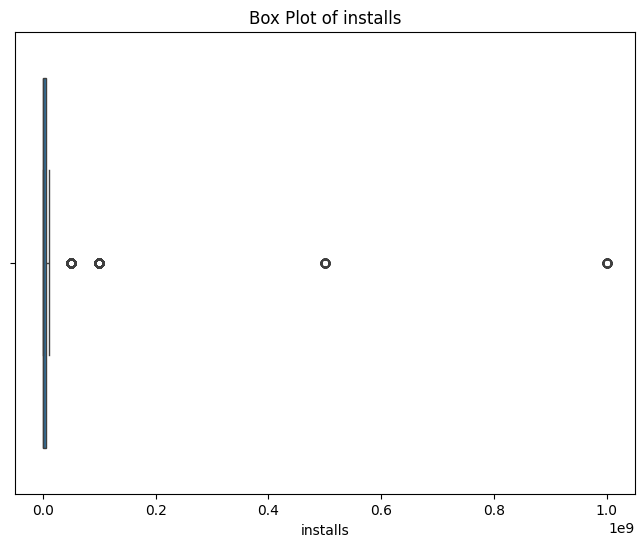

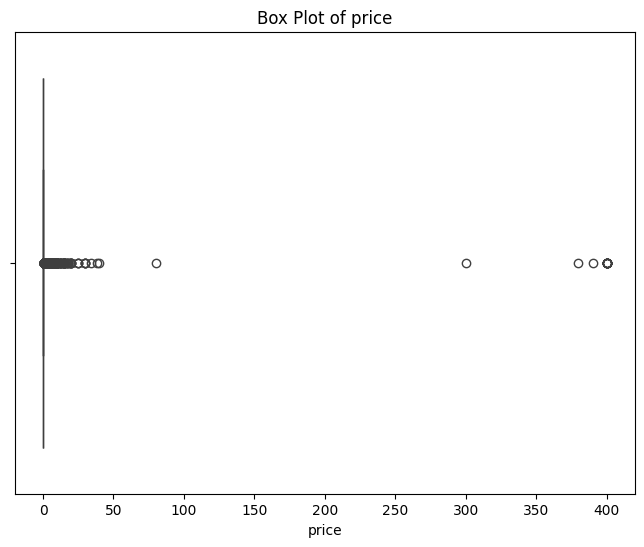

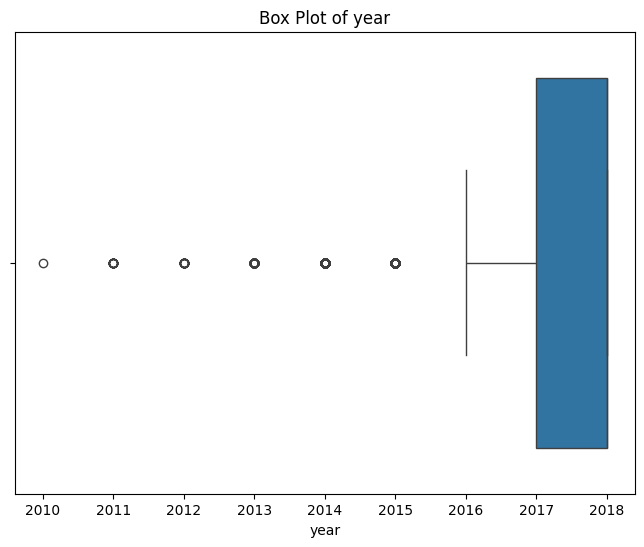

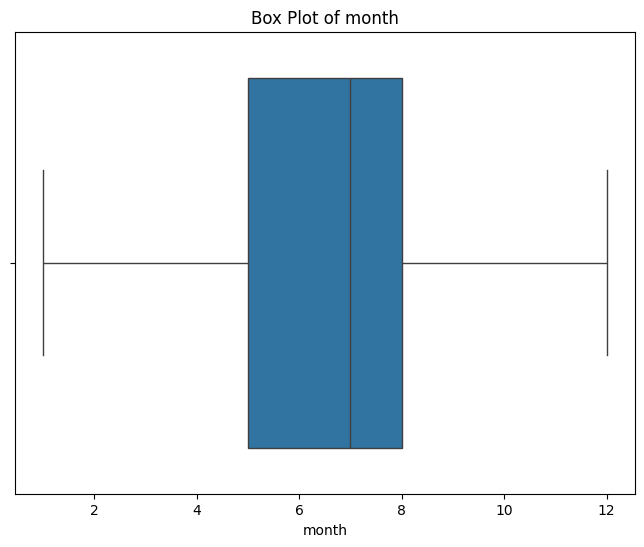

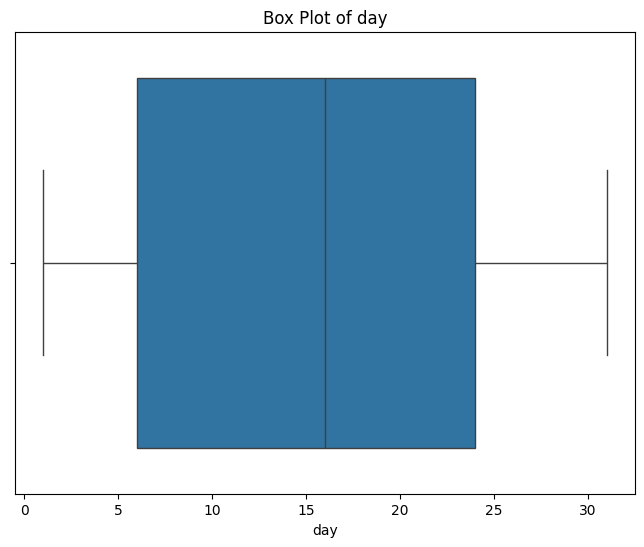

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by addressing the following:

Describe the 'Hotspots' (The Widest Parts): Focus on where the violin shape is at its widest. This area represents the most common values or "hotspots" in your data. If the violin has two wide "bellies," it means you have two different kinds of "typical" outcomes.

Explain the Full Story (The Overall Shape): The entire shape of the violin tells a much richer story than a simple box. A tall, skinny violin suggests high variety but no single common outcome. A short, wide violin means the data is very consistent and centered around one main value.

Point Out Hidden Groups (Multiple 'Bellies'): The key strength of a violin plot is its ability to uncover hidden groups. If the plot looks like two separate blobs stacked on top of each other, it’s a strong sign that you have two distinct customer segments or operational modes that should be treated differently.

### Technical Analysis (For Modeling) 🔬
For a technical audience, document the key statistical properties:

Distribution Shape & Modality: This is the primary purpose of a violin plot. Describe the shape of the kernel density estimate (KDE). State clearly if the distribution is unimodal, bimodal, or multimodal. The number of peaks or wide sections in the violin directly corresponds to the data's modality.

Skewness and Kurtosis: Visually assess the shape for symmetry. The plot's asymmetry is a direct indicator of skewness. You can also comment on kurtosis (the "tailedness" or peakiness of the distribution), which is visible from the shape in a way that is not possible with a box plot.

Central Tendency & Spread: Refer to the miniature box plot or dot often included inside the violin. Use it to state the median as the measure of central tendency and the Interquartile Range (IQR) for spread, if this internal plot is present.

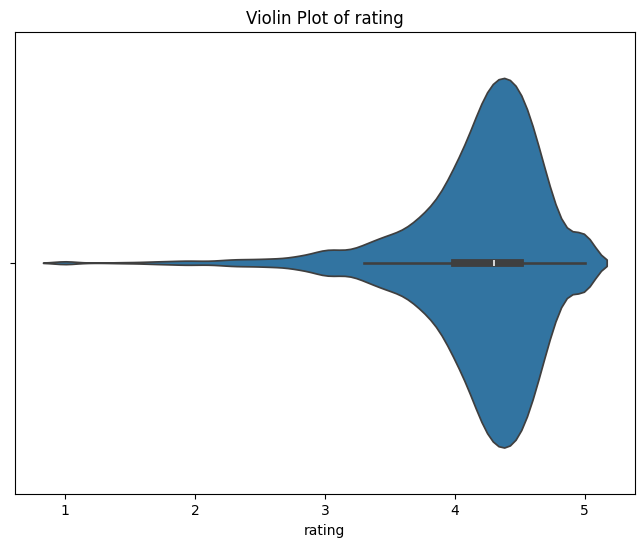

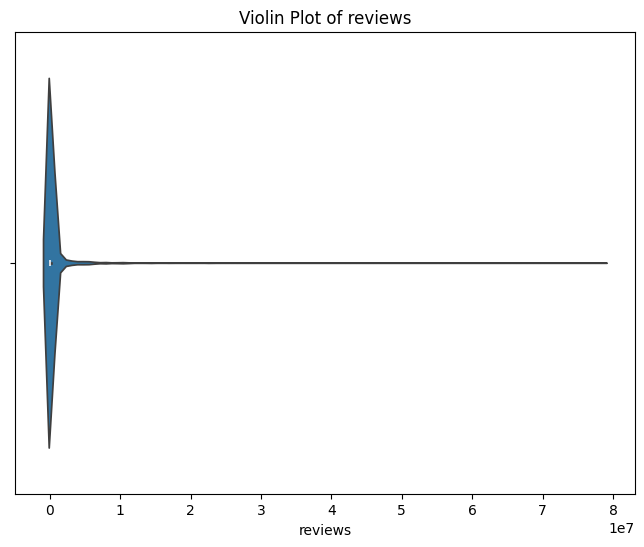

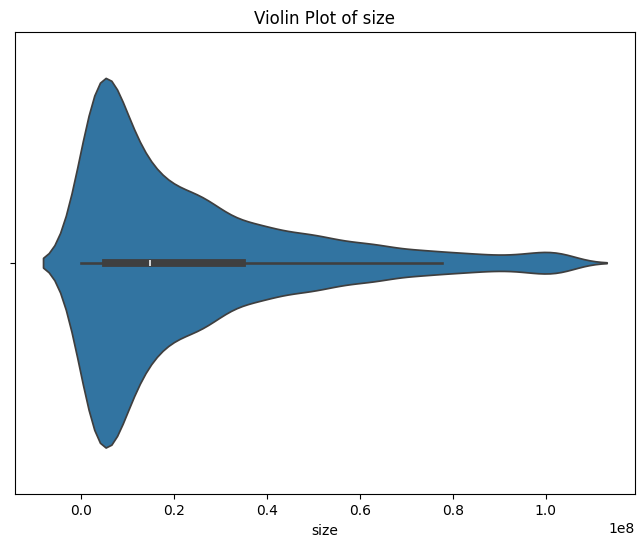

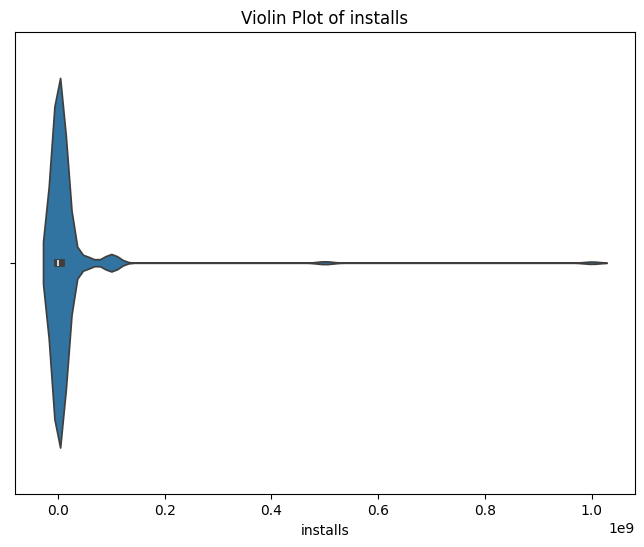

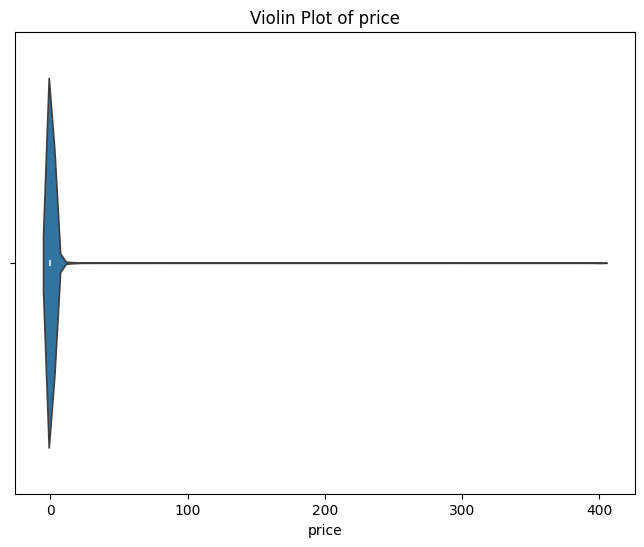

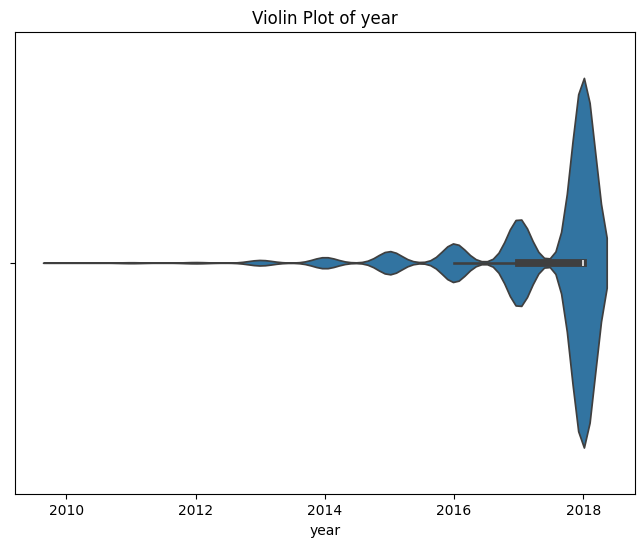

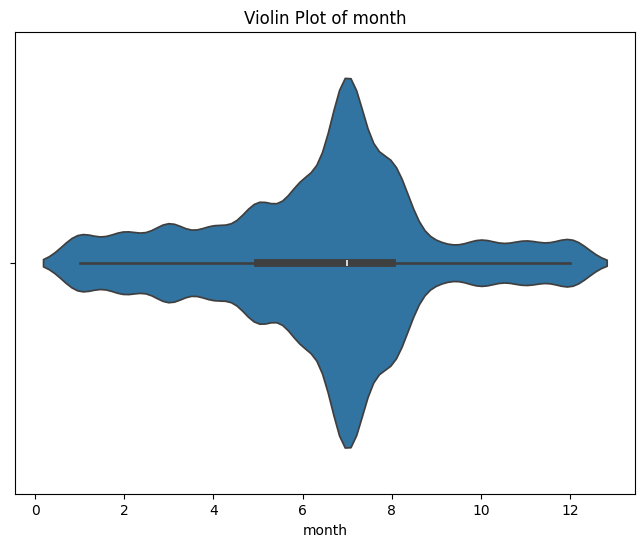

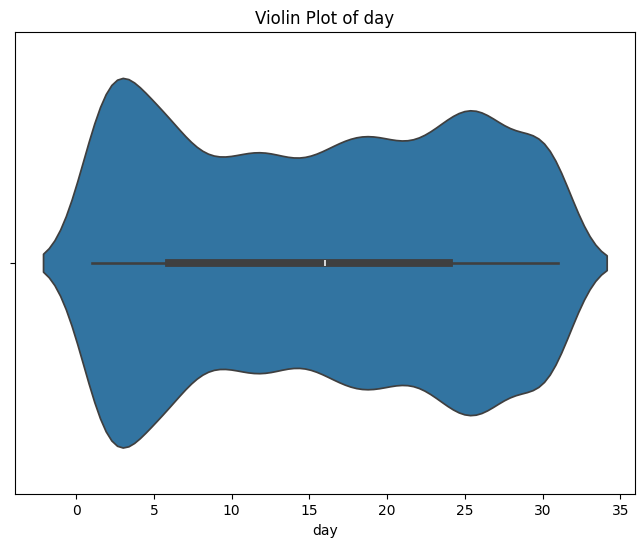

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x=col)
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)
    plt.show()

# now lets go towards the univarient analysis of categoricacategories l column

In [ ]:
# Manually identify and list the categorical columns
categorical_cols = ['app', 'category', 'type', 'content_rating', 'genres']

In [ ]:
for col in categorical_cols:
    unique_counts = df[col].nunique()
    print(f"Column '{col}': {unique_counts} unique values")

Column 'app': 8190 unique values
Column 'category': 33 unique values
Column 'type': 2 unique values
Column 'content_rating': 6 unique values
Column 'genres': 115 unique values


### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by addressing the following:

Identify the 'Winner' (The Longest Bar): Pinpoint the tallest bar. This represents the most popular category, the most common response, or the best-selling product. It’s the clear "winner" in your data.

Compare the Options (Relative Bar Heights): Look at how the other bars compare to each other. Are the options closely contested, or is there one dominant choice and many unpopular ones? This tells you about the diversity of preferences or outcomes.

Find the 'Forgotten' Option (The Shortest Bar): Identify the shortest bar. This could represent an underperforming product, an overlooked service, or a rare issue that might need more investigation or special attention.

### Technical Analysis (For Modeling) 🔬
For a technical audience, document the key statistical properties:

Frequency Distribution & Mode: Describe the frequency distribution across the categories. Report the mode (the category with the highest count) and consider noting the actual counts or proportions for the most significant categories.

Class Imbalance: This is the most critical insight for modeling. Assess the balance between categories. A significant difference in the heights of the bars indicates a class imbalance problem, which can heavily bias machine learning models and requires special handling (e.g., resampling techniques like SMOTE, or using appropriate metrics like F1-score).

Cardinality: Note the number of unique categories displayed on the plot. A very high number of categories (high cardinality) might necessitate feature engineering, such as grouping rare categories into an 'Other' bin before using the feature in a model.



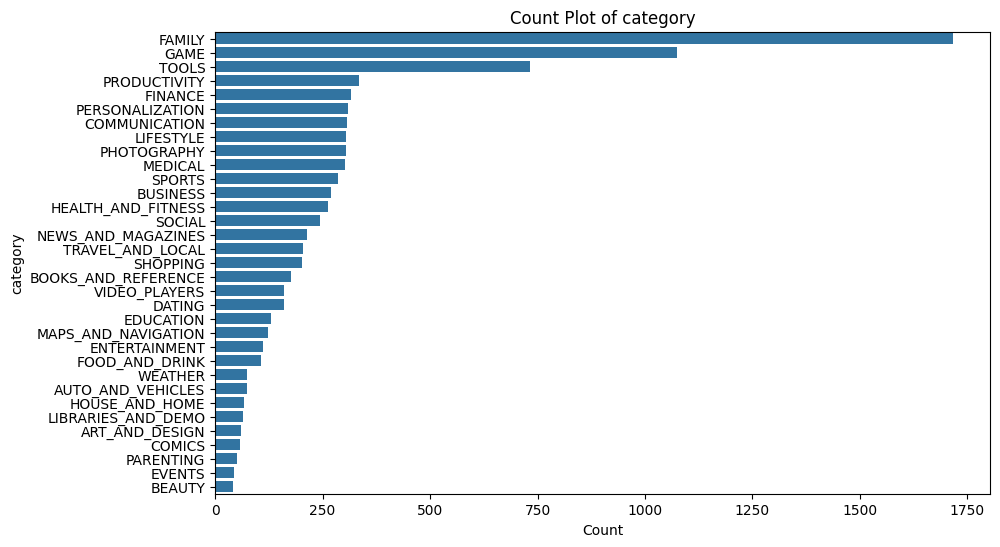

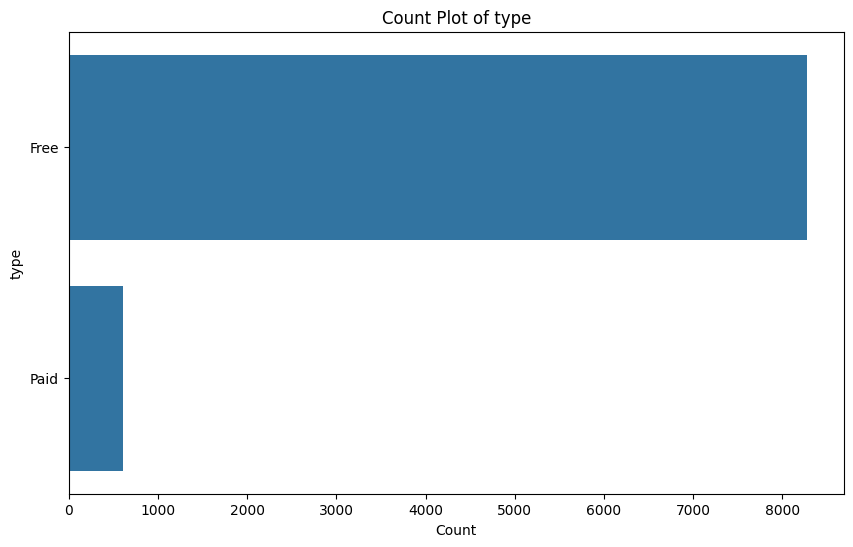

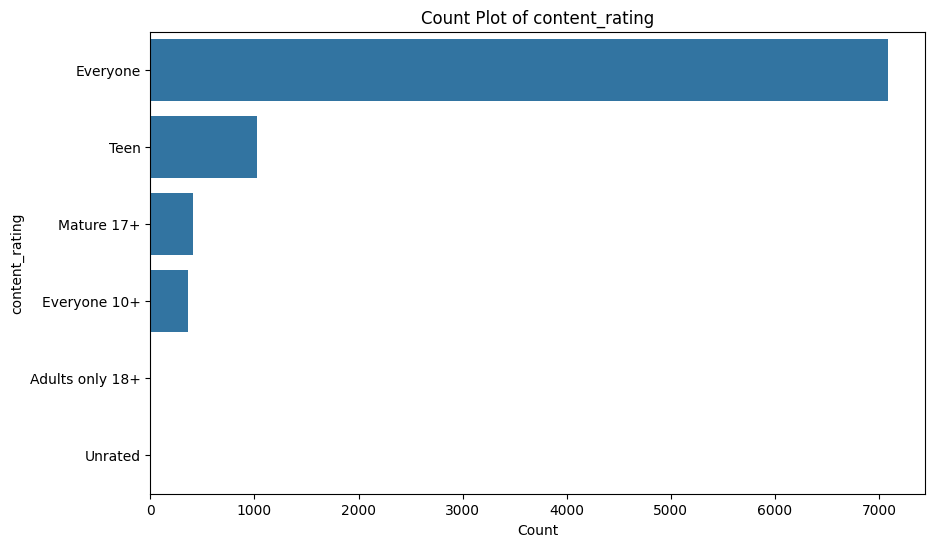

In [ ]:
# Identify categorical columns to plot (excluding those with too many unique values)
plottable_categorical_cols = ['category', 'type', 'content_rating']

for col in plottable_categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by addressing the following:

Identify the 'Biggest Piece' (The Largest Slice): Pinpoint the largest slice of the pie. This represents the category that makes up the biggest portion of the total. For example, "Product A accounts for more than half of all our sales."

Understand the Proportions (Relative Slice Sizes): Look at the size of each slice relative to the whole (100%). This helps to quickly understand the contribution of each part. For example, "Region North and Region South contribute almost equally, together making up about 40% of the total."

Find the 'Minor Contributors' (The Smallest Slices): Identify the smallest "slivers" of the pie. These are the least significant categories. Be aware that it can be hard to accurately compare small slices by eye, but they show which components have the smallest impact overall.

### Technical Analysis (For Modeling) 🔬
For a technical audience, document the key statistical properties:

Proportional Distribution & Mode: Describe the proportional breakdown of the categories. The largest slice represents the mode of the variable. Report the percentage share for the most significant categories to provide precise, quantitative insights.

Class Imbalance: Assess the balance between categories. A pie chart where one slice dominates the circle is a clear visual representation of a class imbalance problem, which is a critical consideration for training machine learning models.

Cardinality & Suitability: Note the number of categories (cardinality). Pie charts are effective for low cardinality (typically fewer than 7 categories). If the chart has too many small slivers, it becomes unreadable and a bar chart would be a superior choice for visualization and accurate comparison.

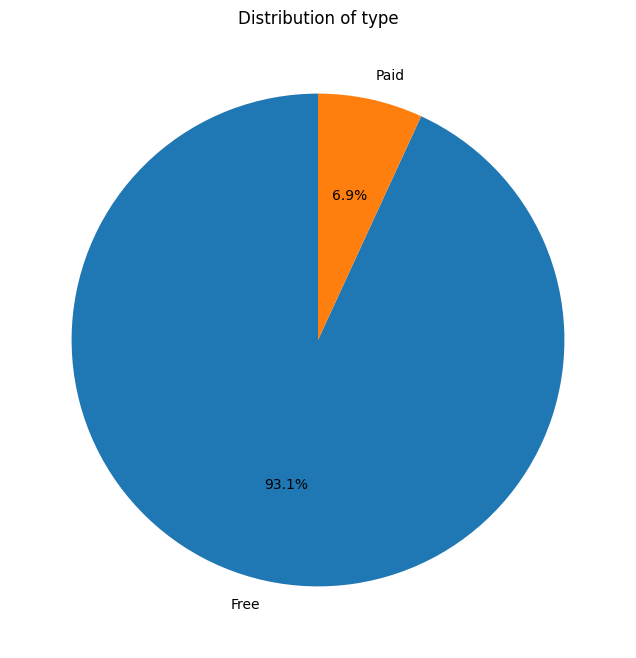

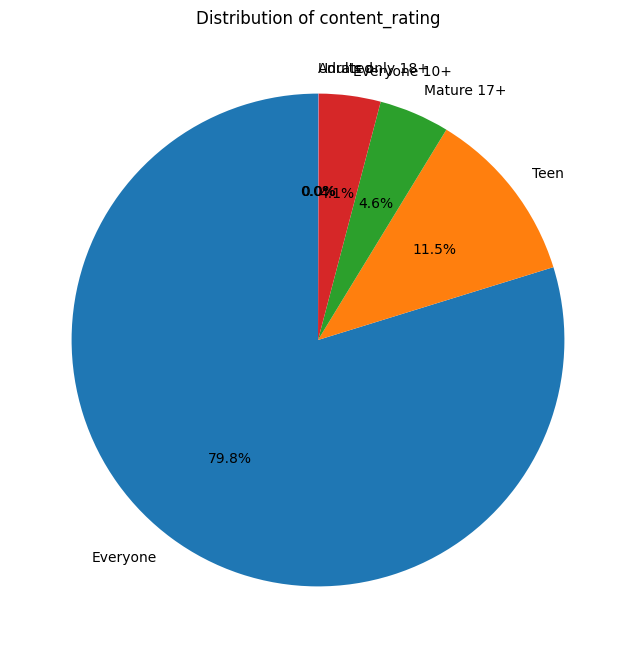

In [ ]:
plottable_categorical_cols = ['type', 'content_rating']

for col in plottable_categorical_cols:
    plt.figure(figsize=(10, 8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.ylabel('') # Hide the default y-label
    plt.show()

* * *
now lets do the unvarient analysis of those categorical column which have very large number of unique values

In [ ]:
#in insight write those column name and tell these column have high cardinality(there are very large number of unique values)

# now lets go toward the bivarient anlysis

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by scanning the grid of charts:

Find Connections (Look for Lines & Patterns): Scan all the small scatter plots. Look for any that form a clear line or a distinct curve, either going up or down. This suggests two factors are connected. For example, "As marketing spend increases, sales also clearly increase."

Spot What's Not Connected (Look for Random Clouds): Most plots will likely look like random clouds of dots with no obvious pattern. This is just as important, as it shows which factors are not influencing each other, helping to challenge assumptions.

Discover Group Behavior (Look for Color Clusters): If the dots are colored (e.g., by customer type), check if the different colors form separate groups or follow different trends in any of the plots. This is a powerful way to see if different segments (like 'New' vs. 'Returning' customers) behave differently.

### Technical Analysis (For Modeling) 🔬
For a technical audience, systematically document the relationships between variable pairs:

Correlation & Linear Relationships: For each off-diagonal scatter plot, assess the relationship's direction (positive or negative), strength (strong, moderate, or weak), and form (linear or non-linear). This is the primary method for visually identifying potentially predictive features.

Multicollinearity: Pay close attention to pairs of predictor variables that show a strong linear correlation. This is a visual indicator of multicollinearity, which can destabilize linear models and may require handling (e.g., by removing one of the variables, using PCA, or applying regularization).

Non-Linear Patterns: Look for clear non-linear shapes like curves (U-shaped, exponential, etc.). The presence of such patterns suggests that linear models may be insufficient and that polynomial features or non-linear algorithms (like tree-based models) might yield better performance.

Individual Distributions (Diagonal Plots): Use the plots on the grid's diagonal (histograms or KDEs) to quickly assess the distribution (skewness, modality) of each individual variable, which informs necessary preprocessing steps like data transformation.

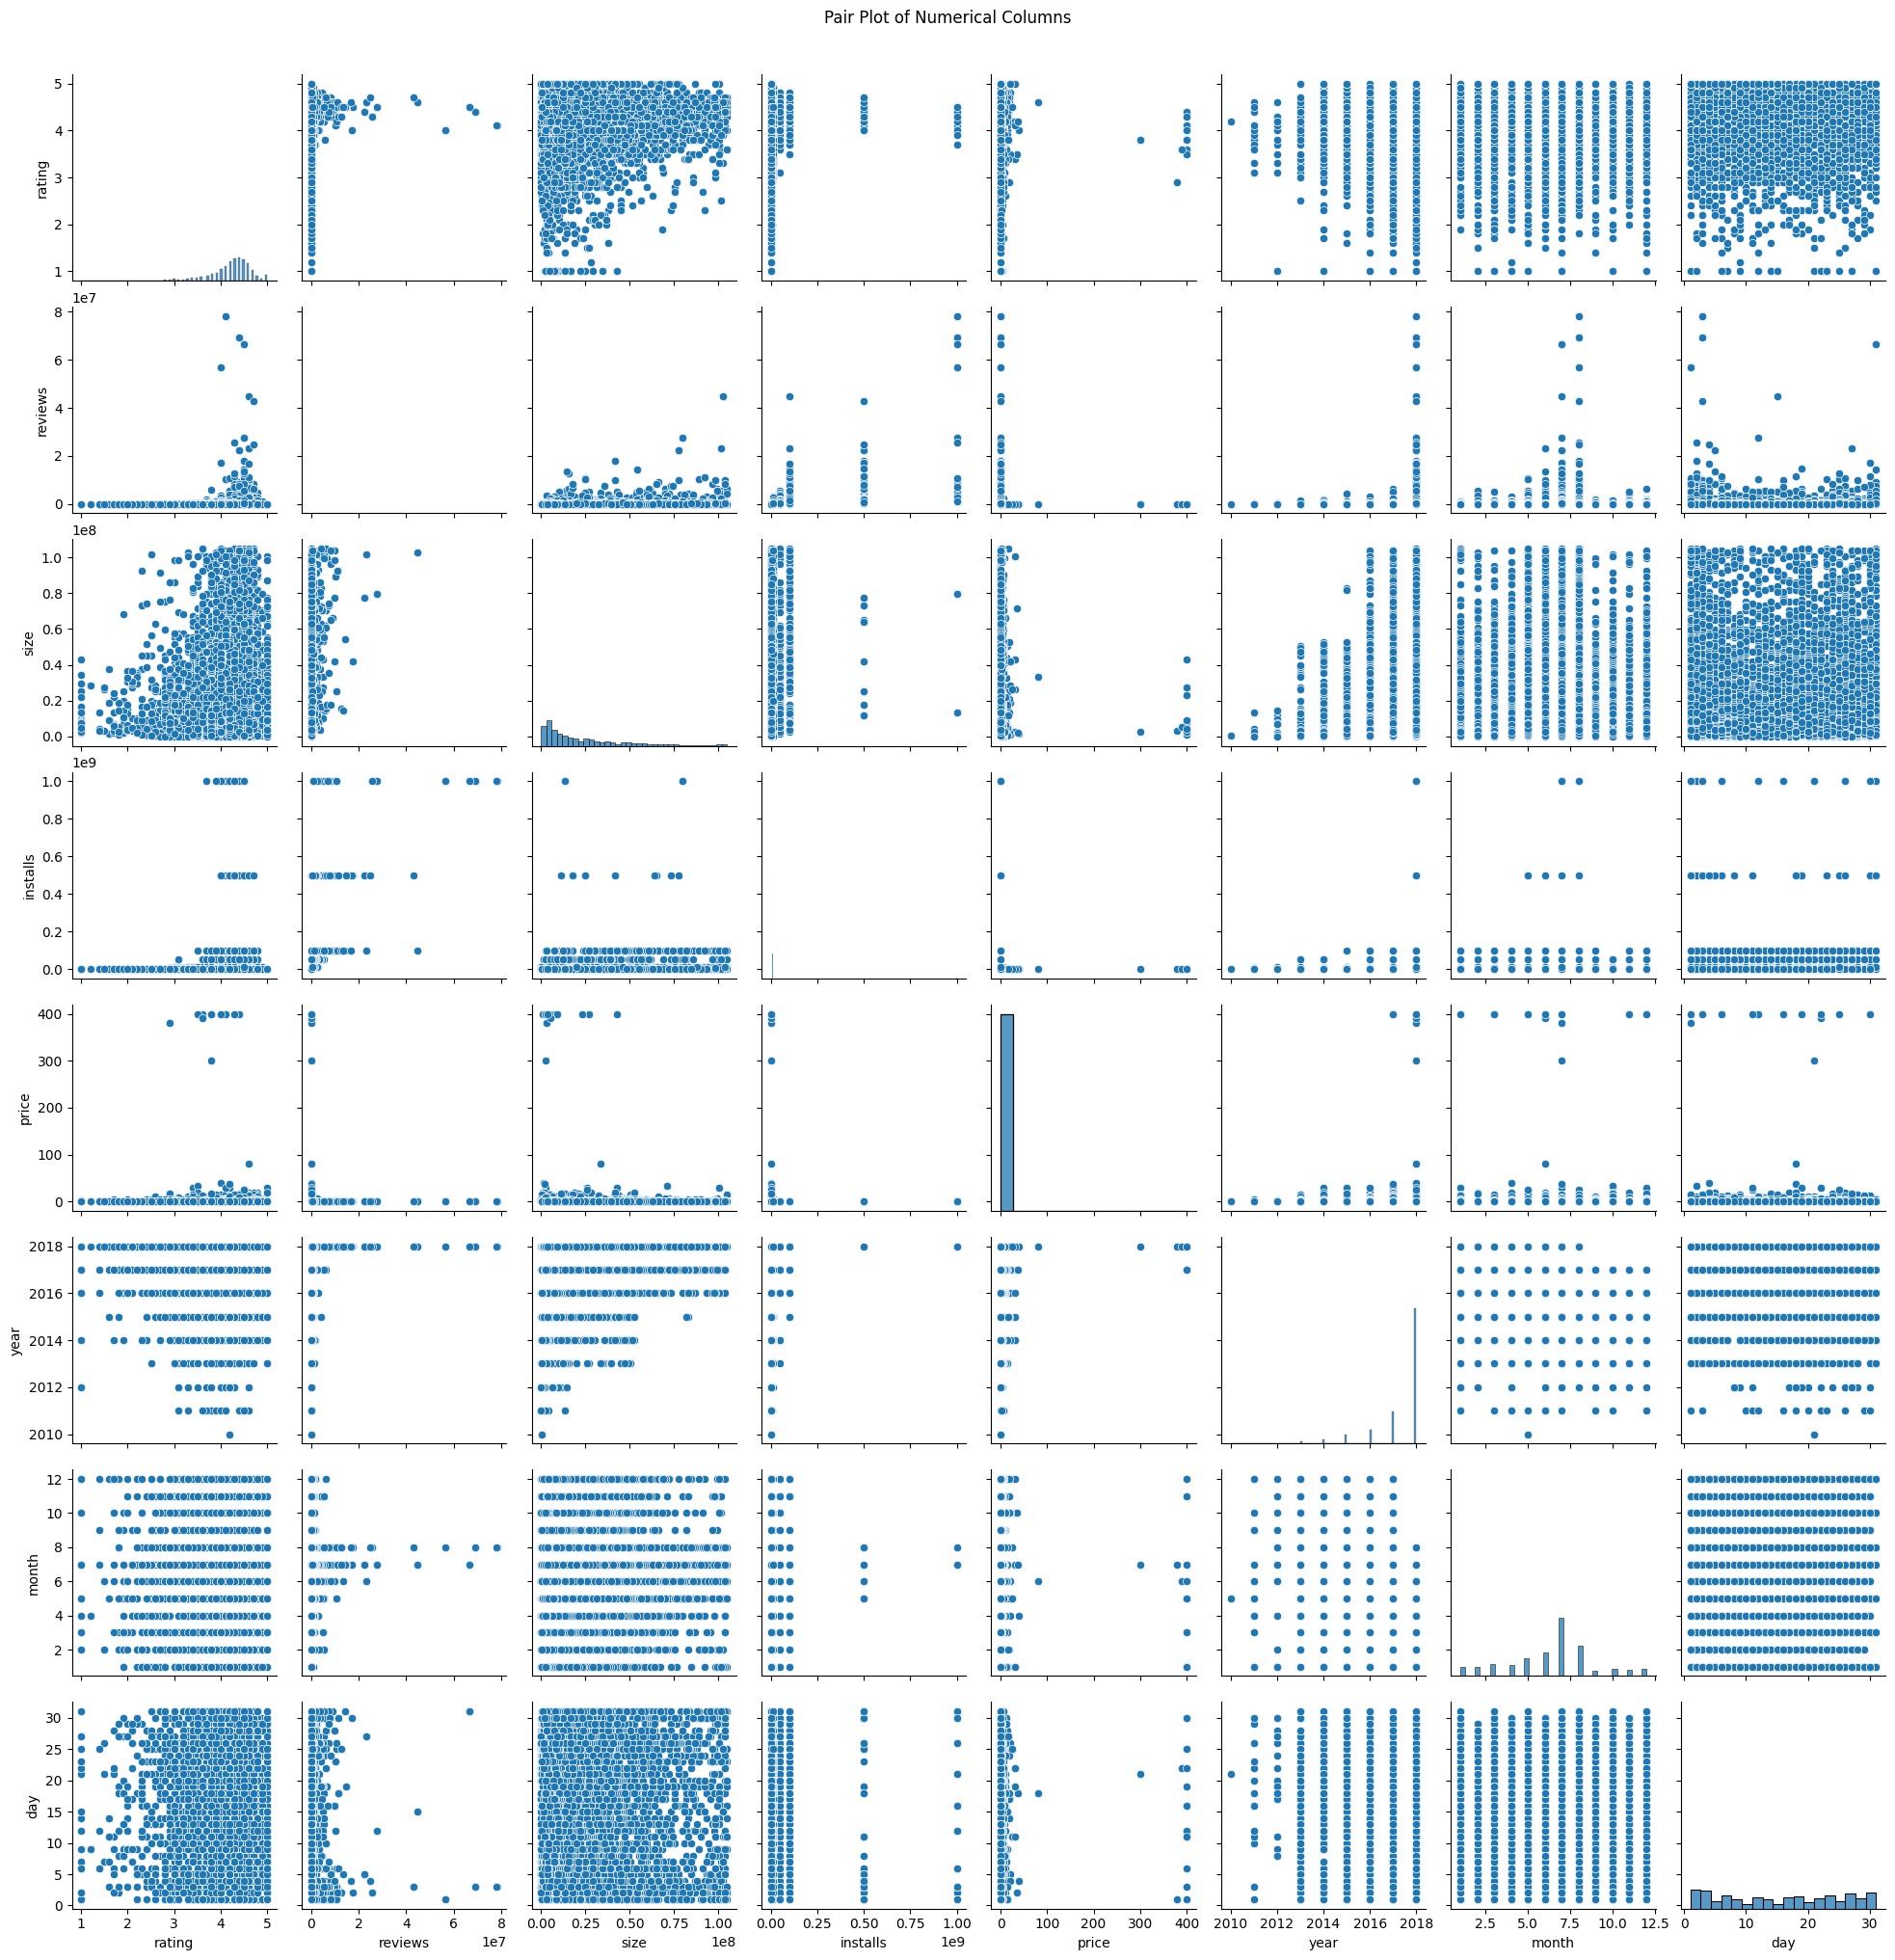

In [ ]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

## Regression Pair Plot Interpretation Guide
Use these guiding points to analyze the fitted regression lines and uncover the strength and nature of relationships between variables.

### Business Summary (The "So What?") 📈
For a non-technical audience, focus on the lines drawn through the data points:

See the Trend Instantly (The Fitted Line): Look at the direction of the line in each plot. A line going up means as one factor increases, the other tends to increase. A line going down means as one increases, the other decreases. A flat line means there's no clear relationship.

Judge the Trend's Reliability (How Scattered are the Dots?): Notice how close the data points are to the fitted line. If the dots are tightly packed around the line, the relationship is strong and reliable. If they are widely scattered, the trend is weak and less predictable.

Check Our Confidence (The Shaded Area): The faint shaded area around the line shows our statistical confidence in the trend. A narrow band means we are very certain about the relationship. A wide band suggests more uncertainty.

### Technical Analysis (For Modeling) 🔬
For a technical audience, analyze the fitted regression and its properties:

Linear Model Fit & Direction: The line represents a simple linear regression fit. Assess the slope's direction (positive/negative) and visually estimate its magnitude (steep/flat). This provides a direct preview of a linear model's coefficient for that pair of variables.

Goodness of Fit & Residuals: The scatter of the points around the fitted line provides a visual proxy for the model's potential R-squared and the magnitude of the residuals. Tightly clustered points suggest a better linear fit and smaller errors.

Homoscedasticity vs. Heteroscedasticity: Observe the spread of the points around the line from left to right. If the spread is constant, the data exhibits homoscedasticity. If the spread fans out or funnels in (a cone shape), it indicates heteroscedasticity, which violates a key assumption of standard linear regression.

Influence of Outliers: Assess if the regression line appears to be heavily skewed or "pulled" by a few extreme data points. These influential outliers can significantly affect the calculated slope and intercept of the model.

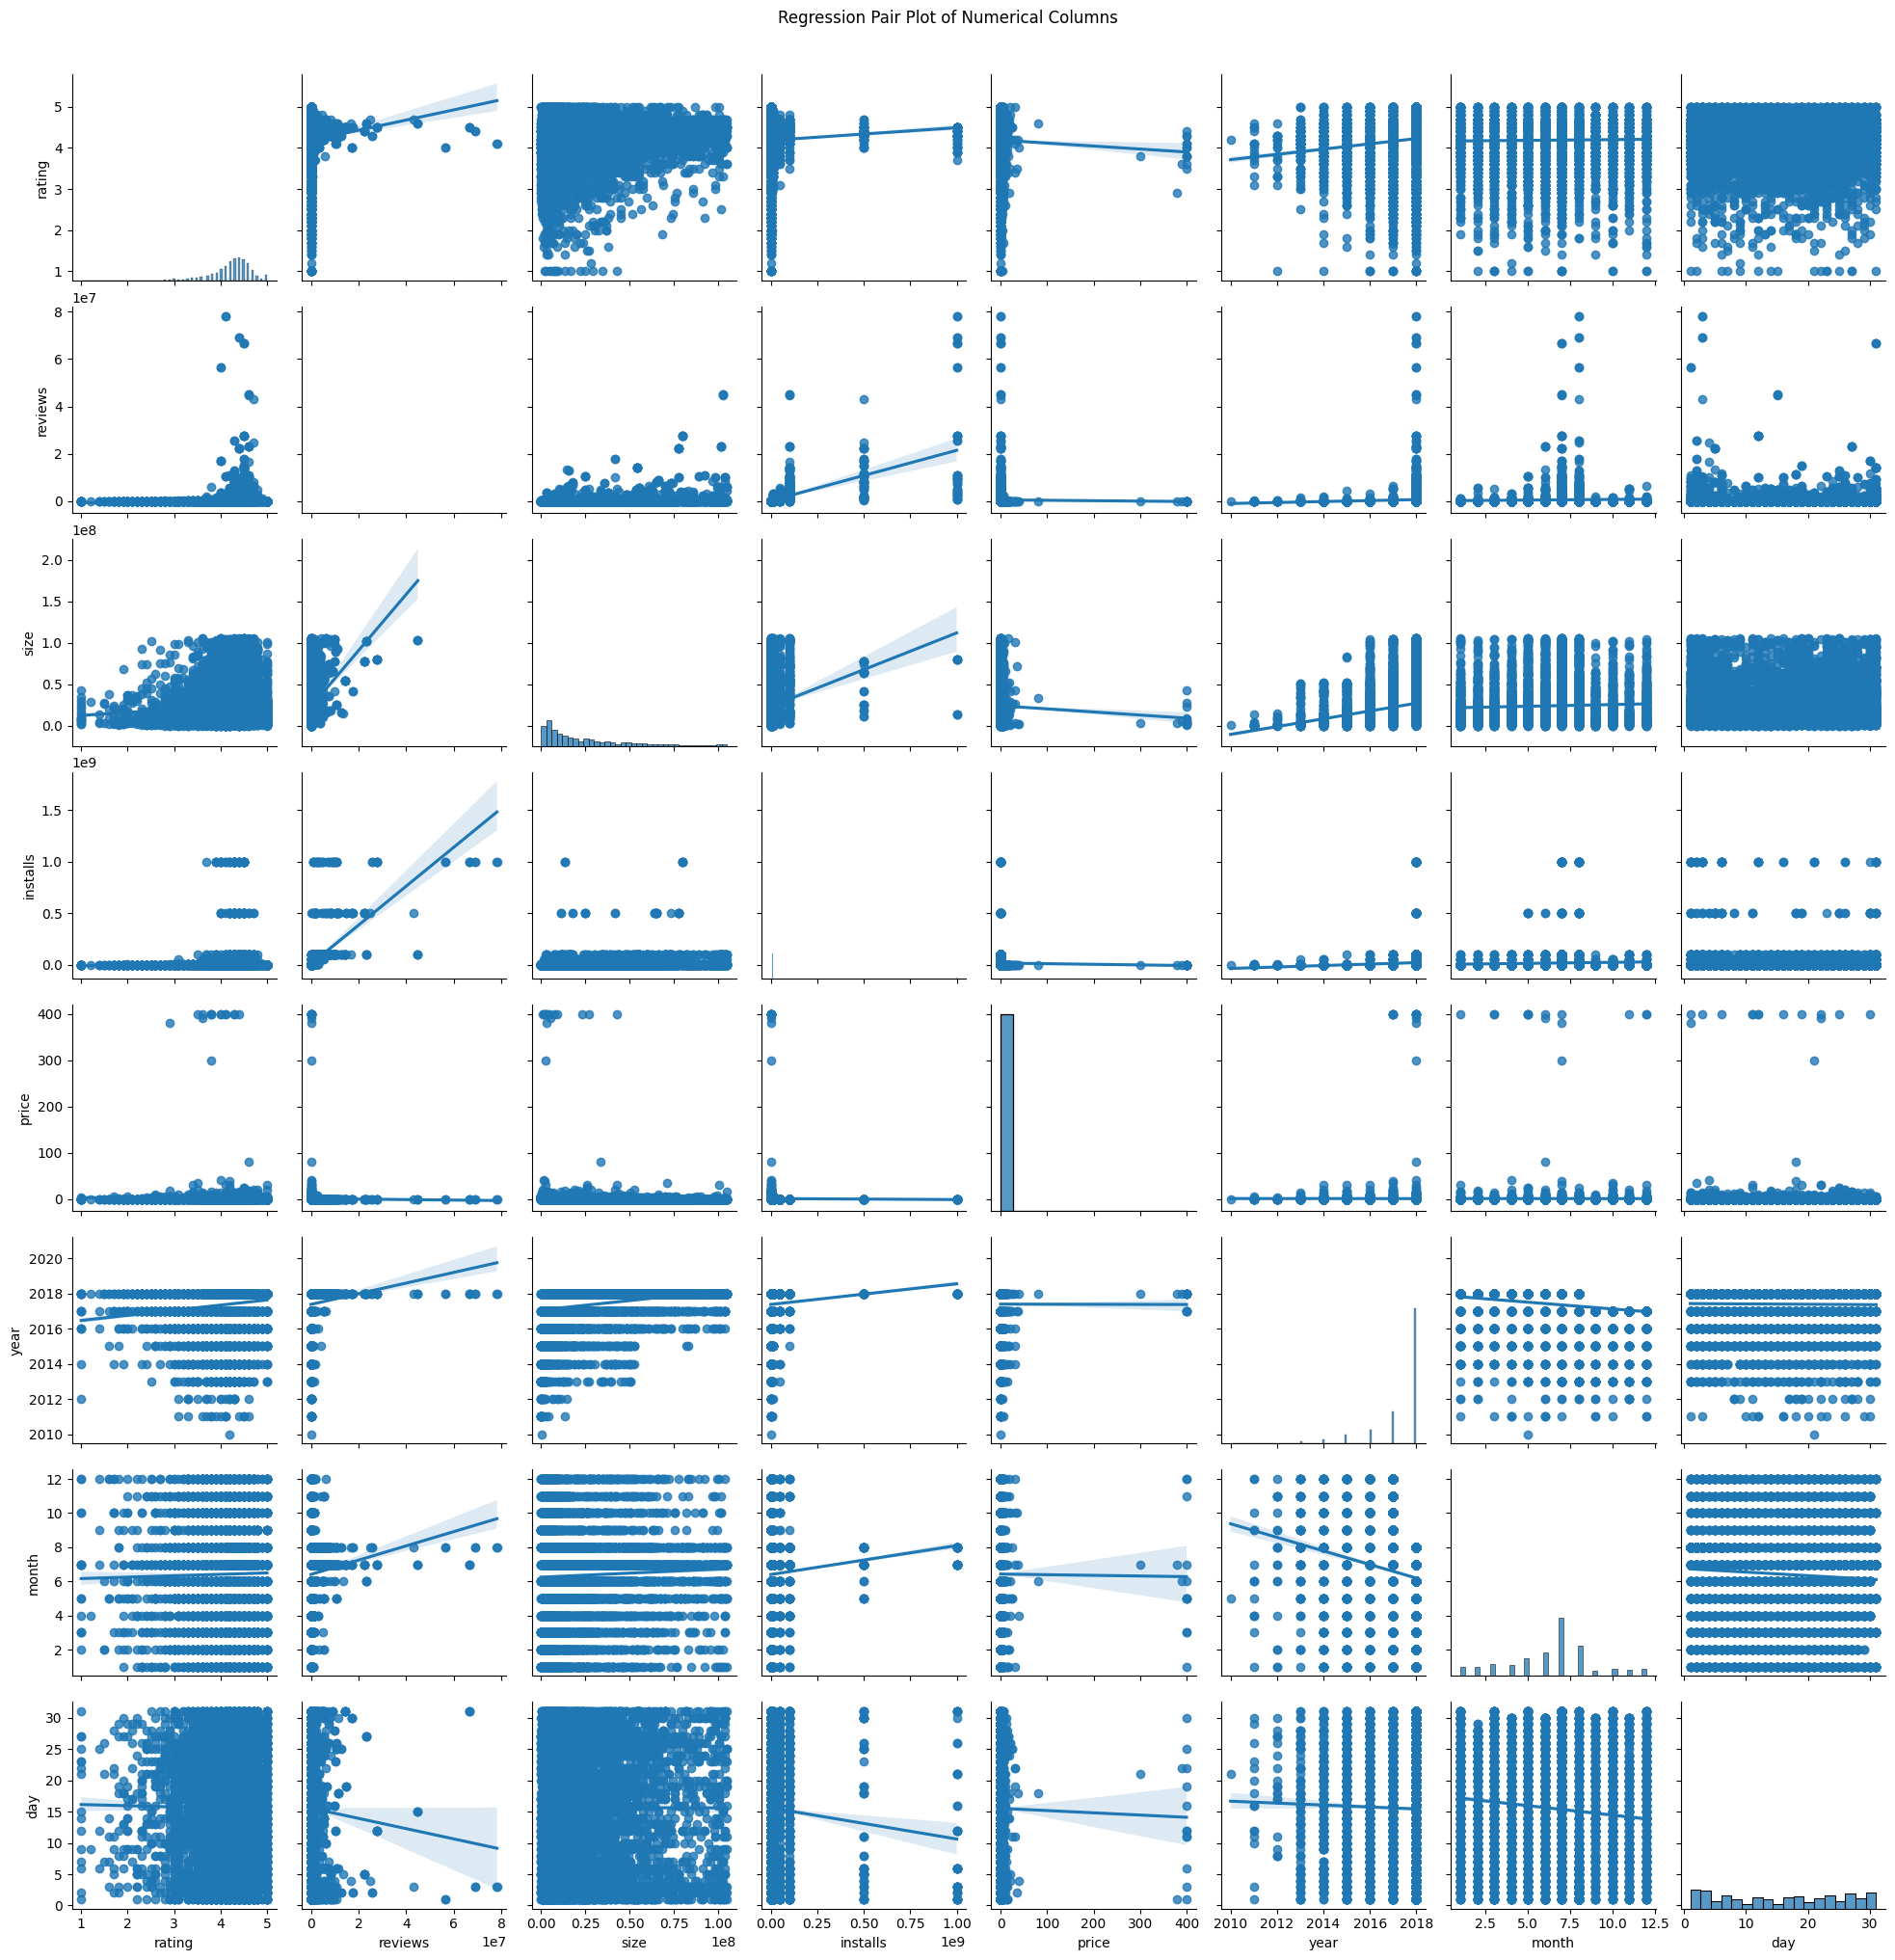

In [ ]:
sns.pairplot(df[numerical_cols], kind='reg')
plt.suptitle('Regression Pair Plot of Numerical Columns', y=1.02)
plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by comparing the bars:

Compare Performance (Relative Bar Heights): Directly compare the heights of the bars. Each bar represents the average (or total) value for a specific category. This lets you quickly answer questions like, "Which product line has the highest average rating?" or "Which region generates the most sales?"

Gauge the Difference (Gaps Between Bars): Look at the difference in height between the bars. A large gap shows a significant difference in performance between categories. Small gaps suggest the categories perform similarly on this measure.

Highlight the Best and Worst (Tallest & Shortest Bars): Instantly identify the top performer (the tallest bar) and the lowest performer (the shortest bar). This is useful for spotting successes to replicate and areas that need improvement.

### Technical Analysis (For Modeling) 🔬
For a technical audience, assess the relationship between the categorical and numerical variables:

Feature Importance & Predictive Power: The plot visually demonstrates the relationship between a categorical feature and a numerical variable (often the target). Significant and consistent differences in the mean value (bar heights) across categories suggest that the categorical feature is a strong predictor and likely has high feature importance.

Variance Within Groups (Error Bars): If the plot includes error bars (representing standard deviation or confidence intervals), examine their size. Large error bars indicate high variance within a category, meaning the average is less representative of all the data points in that group. Small error bars signify greater consistency.

Feature Engineering Opportunities: Observe if any categories have very similar bar heights. These categories might be candidates for grouping together into a single, combined category to simplify a model without losing much predictive power.

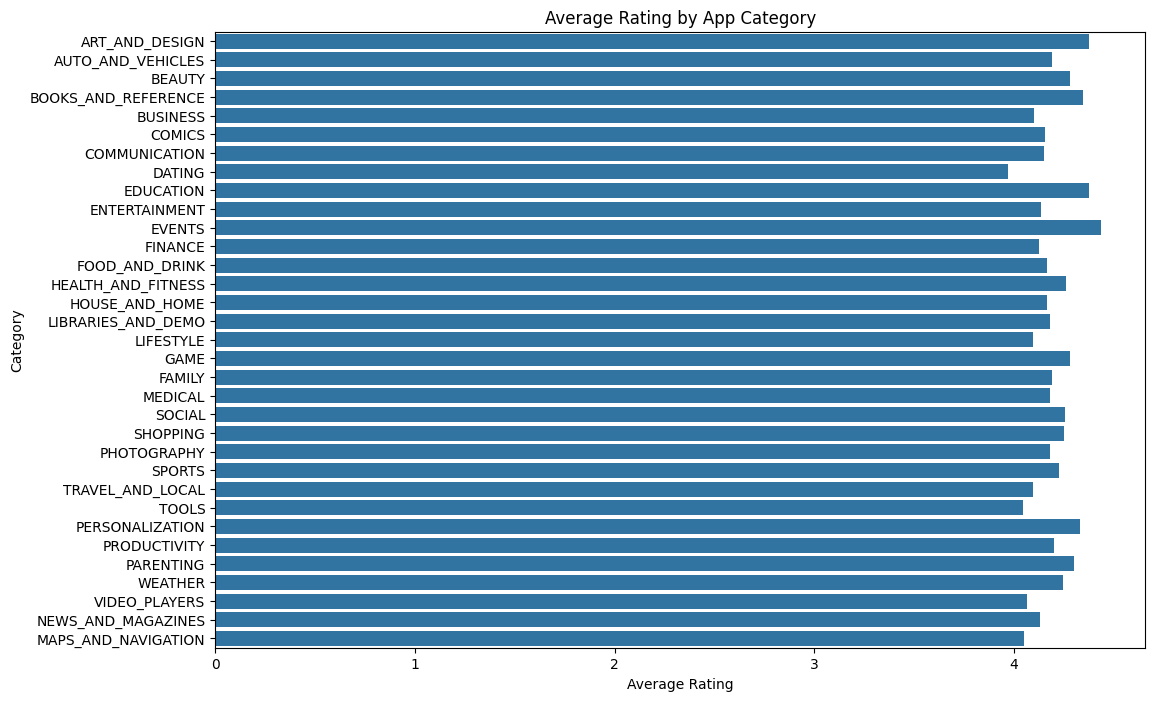

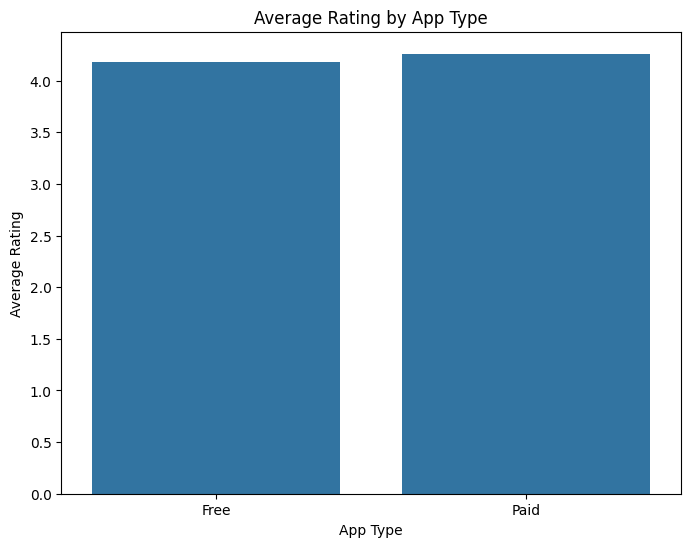

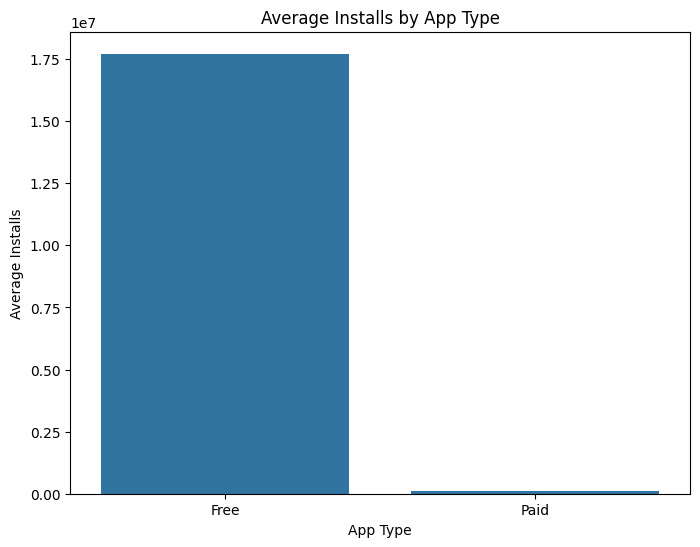

In [ ]:
# Example 1: Average Rating by Category
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='rating', y='category', errorbar=None)
plt.title('Average Rating by App Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# Example 2: Average Rating by Type (Free vs Paid)
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='type', y='rating', errorbar=None)
plt.title('Average Rating by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Rating')
plt.show()

# Example 3: Average Installs by Type (Free vs Paid)
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='type', y='installs', errorbar=None)
plt.title('Average Installs by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Installs')
plt.show()
# use your common sence to choose columns for plotting

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by comparing the boxes:

Compare the Mid-Point (The Median Lines): Look at the horizontal line inside each box. This is the median, or typical value, for that group. By comparing where these lines sit, you can quickly see which category typically has a higher or lower value. For example, "The typical customer satisfaction score for 'Product A' is noticeably higher than for 'Product B'."

Check for Consistency (The Box Sizes): Compare the heights of the boxes. A short, compact box means the outcomes for that category are very consistent and predictable. A tall box means the outcomes are highly varied and all over the place.

Find the Exceptions in Each Group (The Dots): Look for the dots (outliers) above or below each box. This shows which categories have the most extreme high or low values. For example, "While the typical sale amount is similar across regions, the 'North' region has far more high-value outlier sales."

### Technical Analysis (For Modeling) 🔬
For a technical audience, compare the distributions across categories:

Difference in Distributions & Predictive Power: The plot allows for a detailed comparison of the distribution (median, quartiles, range) of the numerical variable across each category. Significant differences in the medians (position of the boxes) or the Interquartile Ranges (IQRs) (height of the boxes) suggest the categorical feature is a strong predictor.

Variance & Skewness per Category: Assess the properties of each box individually. This allows you to check for differences in variance (IQR) and skewness between the groups. For instance, one category might have a tight, symmetric distribution while another has a wide, right-skewed distribution.

Checking for Homoscedasticity: By visually comparing the heights of the boxes (the IQRs), you can assess if the variance is equal across groups (a key assumption for tests like ANOVA). If some boxes are much taller than others, it suggests heteroscedasticity (unequal variances), which may need to be accounted for in statistical testing or modeling.

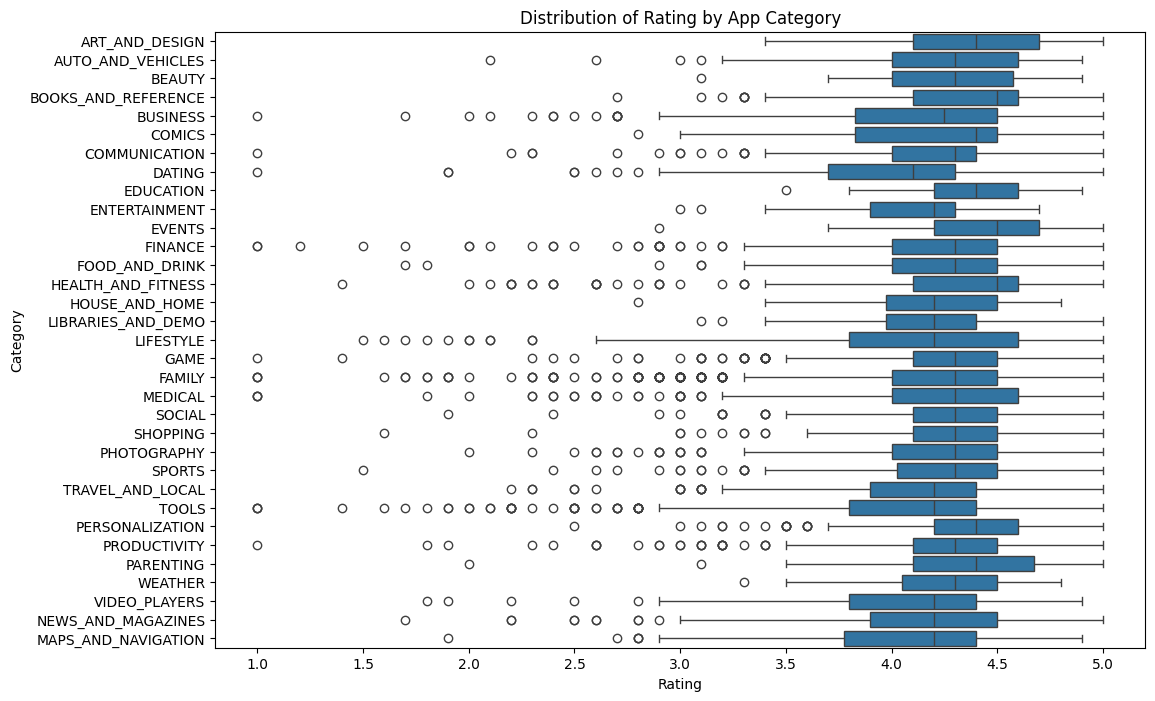

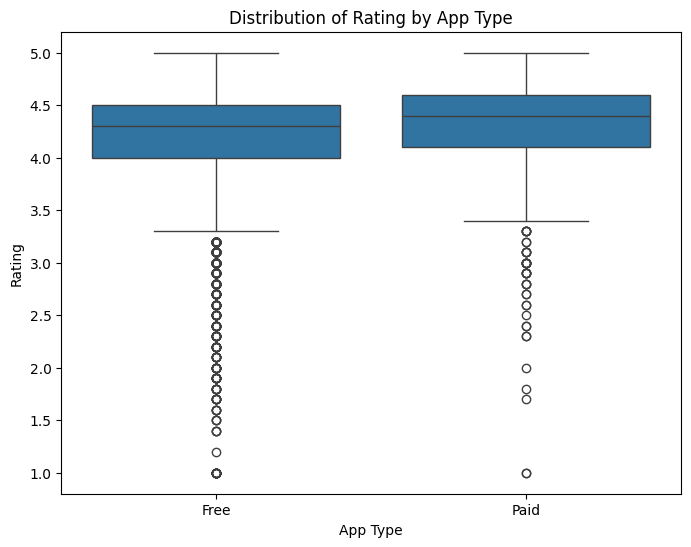

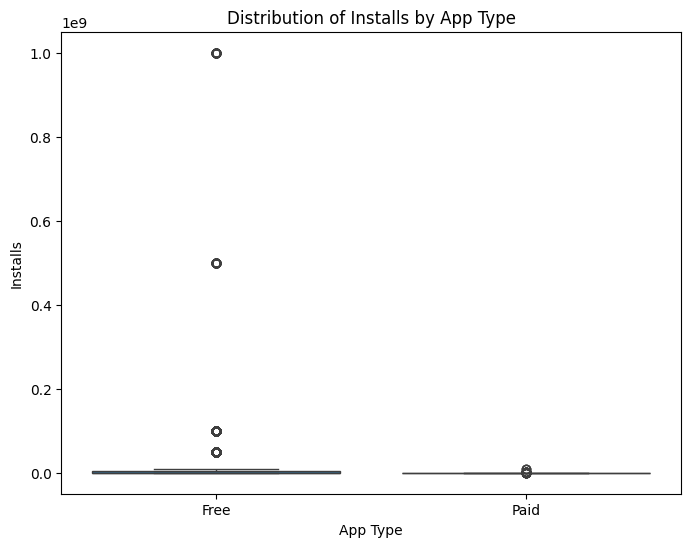

In [ ]:
# Example 1: Distribution of Rating by Category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='rating', y='category')
plt.title('Distribution of Rating by App Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

# Example 2: Distribution of Rating by Type (Free vs Paid)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y='rating')
plt.title('Distribution of Rating by App Type')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()

# Example 3: Distribution of Installs by Type (Free vs Paid)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='type', y='installs')
plt.title('Distribution of Installs by App Type')
plt.xlabel('App Type')
plt.ylabel('Installs')
plt.show()

# Add more box plots for other interesting combinations as needed
# Example: Distribution of Price by Type
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df, x='type', y='price')
# plt.title('Distribution of Price by App Type')
# plt.xlabel('App Type')
# plt.ylabel('Price')
# plt.show()

# Example: Distribution of Rating by Content Rating
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, x='rating', y='content_rating')
# plt.title('Distribution of Rating by Content Rating')
# plt.xlabel('Rating')
# plt.ylabel('Content Rating')
# plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by comparing the violin shapes:

Compare the 'Hotspots' (The Widest Parts): Look at the widest part of each violin shape. This represents the most common value or "hotspot" for that group. Comparing these hotspots shows you which category's typical outcome is higher or lower.

Compare the 'Full Story' (The Overall Shapes): Look at the entire shape of each violin. A short, wide violin means the results for that group are very consistent. A tall, skinny violin means the results are highly varied. The shape gives you a much richer feel for the data than a simple box.

Find Hidden Patterns in Each Group (Multiple 'Bellies'): The superpower of a violin plot is spotting complex patterns. If a single violin has two or more wide "bellies," it means there are multiple common outcomes within that one group. This can uncover hidden customer segments or behaviors that other plots would miss.

### Technical Analysis (For Modeling) 🔬
For a technical audience, compare the full distributions across categories:

Comparing Distributions & Predictive Power: The plot allows for a detailed comparison of the full probability density distributions (KDEs) across categories. Significant differences in the shape, modality, or location of these distributions strongly suggest the categorical feature is a powerful predictor.

Modality & Shape per Category: This is the key advantage over a box plot. For each category, determine if its distribution is unimodal, bimodal, or multimodal. You can also visually assess skewness and kurtosis for each group with much greater detail.

Assessing Variance and Distributional Assumptions: Compare the general spread and shape of the violins to check for homoscedasticity (equal variance). More importantly, you can see if the form of the distributions differs—for example, one group may be normally distributed while another is bimodal, which is a critical insight for modeling.

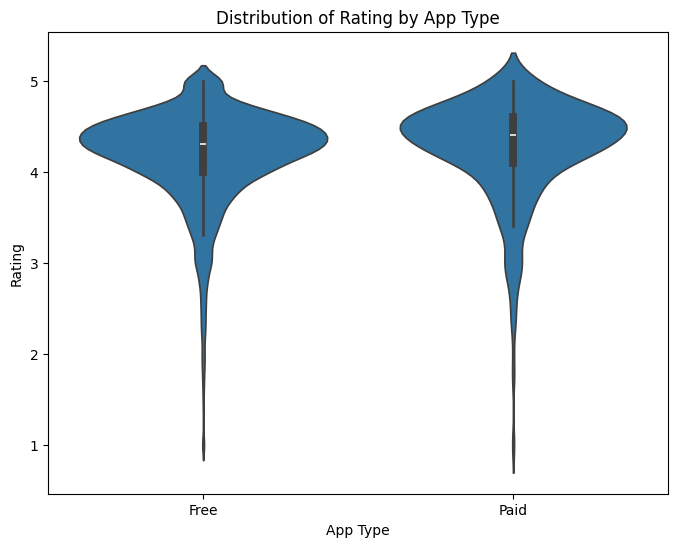

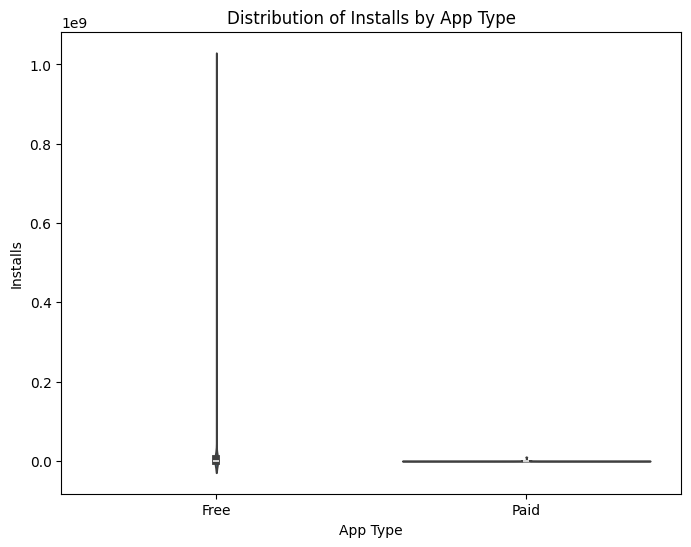

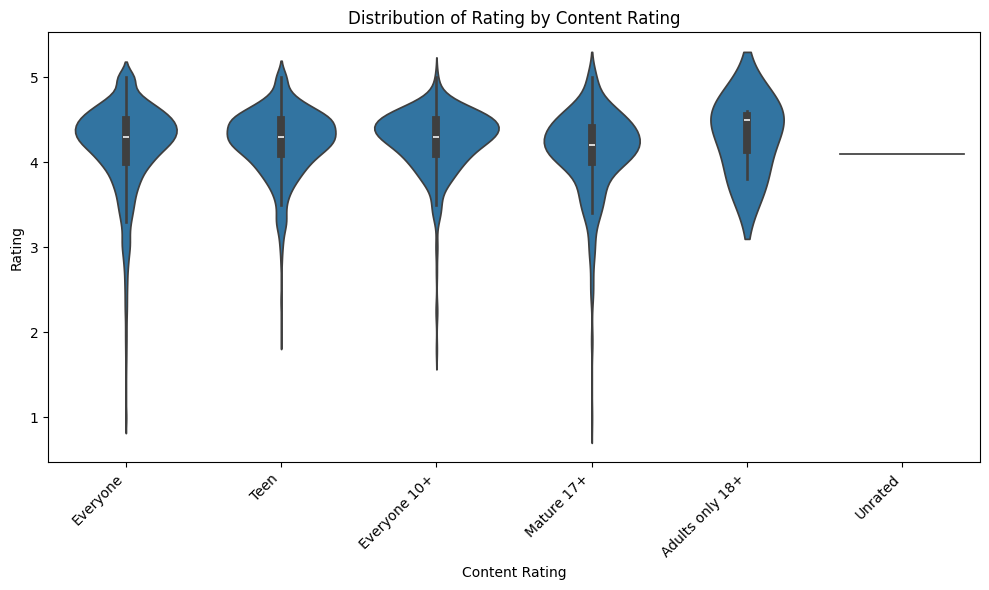

In [ ]:
# Example 1: Distribution of Rating by Type (Free vs Paid)
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='type', y='rating')
plt.title('Distribution of Rating by App Type')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()

# Example 2: Distribution of Installs by Type (Free vs Paid)
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='type', y='installs')
plt.title('Distribution of Installs by App Type')
plt.xlabel('App Type')
plt.ylabel('Installs')
plt.show()

# Example 3: Distribution of Rating by Content Rating
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='content_rating', y='rating')
plt.title('Distribution of Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Add more violin plots for other interesting combinations as needed
# Example: Distribution of Rating by Category (might be too many categories)
# plt.figure(figsize=(12, 8))
# sns.violinplot(data=df, x='rating', y='category')
# plt.title('Distribution of Rating by App Category')
# plt.xlabel('Rating')
# plt.ylabel('Category')
# plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by comparing the swarms of dots:

Compare the 'Crowds' (Dense Areas in Each Group): Look for where the dots are most crowded within each category's "swarm." This shows the most typical value or "hotspot" for that group and lets you easily compare which category's typical outcome is higher or lower.

See Every Single Data Point (The Individual Dots): The superpower of a swarm plot is that it shows every single data point. This helps to understand not just the values, but also how many data points are in each category. For example, "Category A has a higher average, but we can see it's based on far fewer data points than Category B."

Compare the Spread and Extremes (The Range of Each Swarm): By looking at how spread out each swarm is, you can compare the variety or consistency within each group. It's also very easy to see which group has the most extreme high or low values by spotting the highest and lowest dots.

### Technical Analysis (For Modeling) 🔬
For a technical audience, analyze the granular distribution across categories:

Comparing Distributions & Sample Sizes: The plot allows for a granular comparison of distributions while explicitly showing the sample size of each group. This is a key advantage over abstract summaries like box plots, as it prevents misinterpreting a distribution based on a very small number of data points.

Underlying Distribution Shape: For each category, the swarm's shape reveals the underlying distribution without algorithmic abstraction (like the binning in a histogram or smoothing in a KDE). This allows for a raw visual assessment of modality, skewness, and gaps within each category's data.

Scalability and Overplotting: The most important technical consideration is that swarm plots do not scale to large datasets. With too many points, the algorithm can no longer prevent overlap, and the plot becomes a dense, unreadable blob (overplotting). It is crucial to note that this plot is best for small to medium-sized datasets; for larger ones, a box or violin plot is more appropriate.

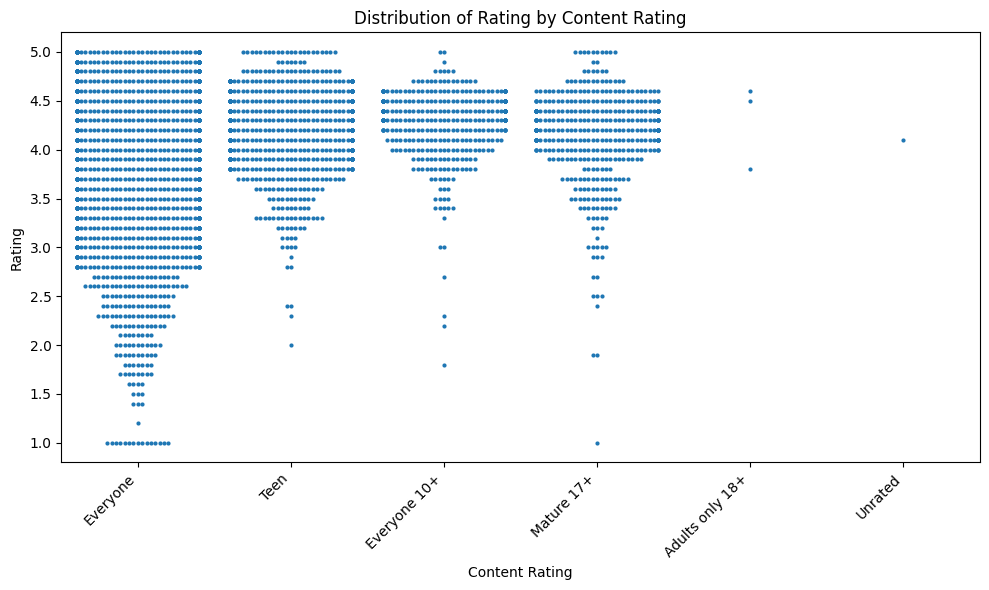

In [ ]:



#Example 2: Distribution of Rating by Content Rating
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='content_rating', y='rating', size=3) # Adjust size as needed
plt.title('Distribution of Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Swarm plots can be slow for columns with many data points, like 'installs' or 'reviews'
# and for categories with many items like 'category'.
# Consider using other plots like box or violin plots for those cases.
# Example (potentially slow): Distribution of Rating by a few selected Categories
# selected_categories = ['GAME', 'FAMILY', 'TOOLS'] # Select a few categories
# df_subset = df[df['category'].isin(selected_categories)]
# plt.figure(figsize=(12, 8))
# sns.swarmplot(data=df_subset, x='category', y='rating', size=3)
# plt.title('Distribution of Rating by Selected App Categories')
# plt.xlabel('Category')
# plt.ylabel('Rating')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by comparing the enhanced boxes:

Compare the Mid-Point (The Center Line): Look at the dark line in the very middle of each shape. This is the median, or typical value, for that group. It's the best starting point for comparing which category is typically higher or lower.

Understand the Layers (The Nested Boxes): Think of the nested boxes as layers of data concentration. The innermost, darkest box shows where the "core" 50% of the data lies. Each progressively wider and lighter box represents the next layer of data. This gives a much better feel for how spread out the data is compared to a standard box plot.

Spot the Extremes (The Dots): Just like a box plot, any dots outside the main shape are outliers. These are the most extreme and unusual cases in each category, which might be special customers or error events worth investigating.

### Technical Analysis (For Modeling) 🔬
For a technical audience, leverage the detailed quantile information:

Enhanced Quantile Analysis: A boxen plot displays letter-value based quantiles. The central box is the Interquartile Range (IQR, 25%-75%). Subsequent boxes represent octiles, hexadeciles, and so on. This provides a more robust and detailed summary of the distribution, especially for larger datasets.

Assessing Tail Behavior and Skewness: This is a key strength. The plot gives much more detail about the tails of the distribution than a standard box plot. You can more accurately assess tail heaviness and skewness. If the boxes on one side of the median are consistently wider and extend further, it's a strong visual indicator of skew.

Scalability and Use Case: Boxen plots are an excellent intermediate choice. They are designed for datasets that are too large for a swarm plot (which would become unreadably dense) but for which you want more distributional detail than a standard box plot provides.

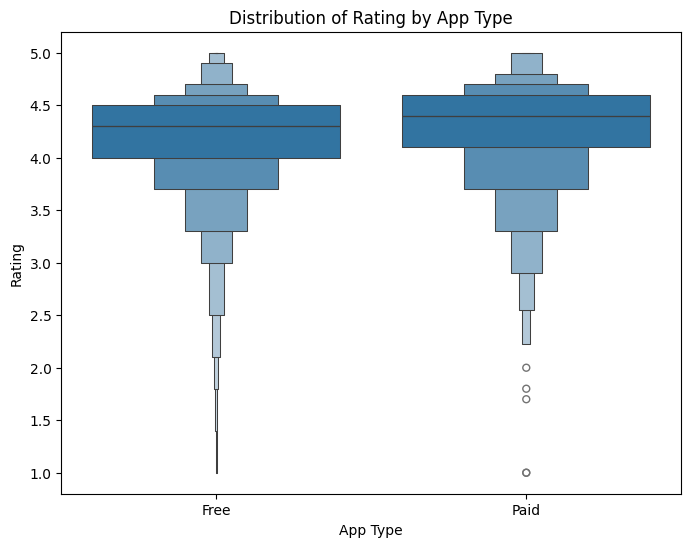

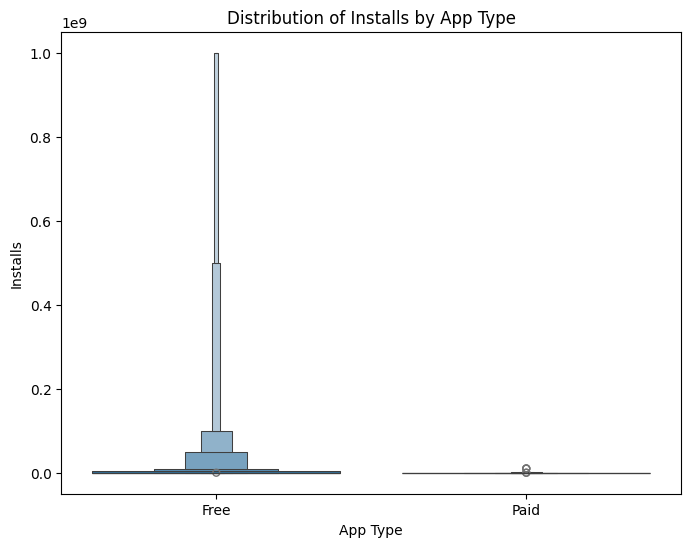

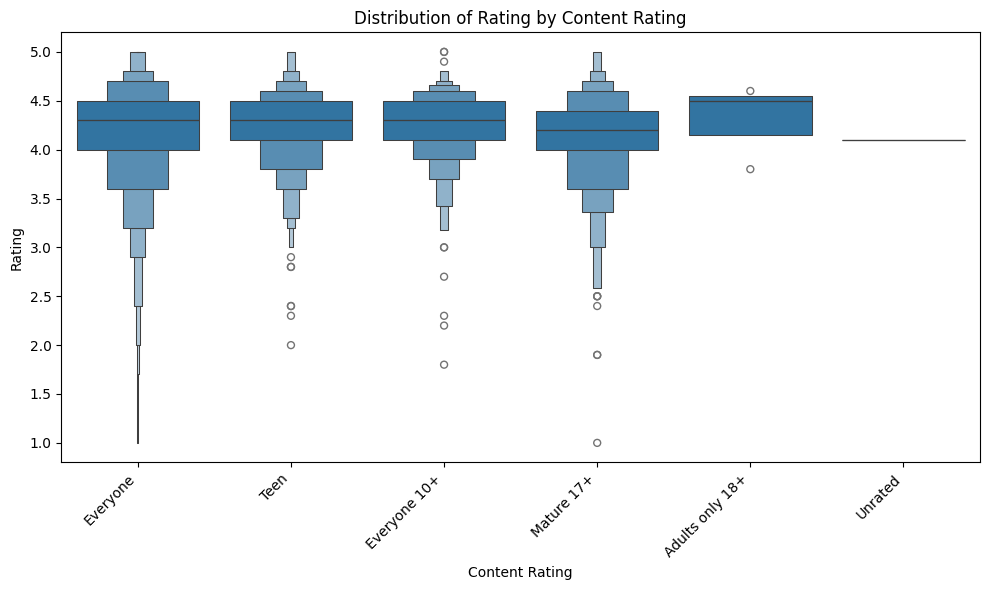

In [ ]:
# Example 1: Distribution of Rating by Type (Free vs Paid)
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x='type', y='rating')
plt.title('Distribution of Rating by App Type')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()

# Example 2: Distribution of Installs by Type (Free vs Paid)
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x='type', y='installs')
plt.title('Distribution of Installs by App Type')
plt.xlabel('App Type')
plt.ylabel('Installs')
plt.show()

# Example 3: Distribution of Rating by Content Rating
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x='content_rating', y='rating')
plt.title('Distribution of Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Add more boxen plots for other interesting combinations as needed
# Example: Distribution of Rating by Category (might be too many categories)
# plt.figure(figsize=(12, 8))
# sns.boxenplot(data=df, x='rating', y='category')
# plt.title('Distribution of Rating by App Category')
# plt.xlabel('Rating')
# plt.ylabel('Category')
# plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by comparing the colored bars:

See the Big Picture First (Total Bar Height): Before looking at the colors, look at the total count for each main category on the x-axis. This tells you which main category is the most popular or frequent overall.

Compare the Mix within Each Group (The Colored Segments): Now, look at the colored segments inside each main category's bar(s). This shows you the breakdown of that category. It answers questions like, "For our best-selling product, what is the mix of new versus returning customers who are buying it?"

Spot Different Patterns (Comparing Proportions): The most powerful insight comes from comparing the proportions of the colored segments across the different main categories. Does one category have a completely different color mix than another? This helps you spot different behaviors, for example, "Laptops are mostly bought by 'Students', but Desktops are mostly bought by 'Professionals'."

### Technical Analysis (For Modeling) 🔬
For a technical audience, analyze the interaction between the categorical variables:

Conditional Frequency Distribution: The plot visualizes the conditional frequency distribution—it shows the distribution of the hue variable conditional on the x-axis variable. This provides a clear view of how the count of one category changes with respect to another.

Identifying Feature Interaction: This is the primary goal. Assess if the proportional breakdown of the hue variable changes significantly across the categories of the x-axis variable. If the color mix is different from one bar group to the next, it suggests a strong interaction effect between the two features, which could be a valuable term to include in a model.

Compositional Analysis: Analyze the composition of each primary (x-axis) category. A bar that is almost entirely one color represents a segment that is very "pure" with respect to the hue variable. This can be useful for deriving business rules or for feature engineering in tree-based models.

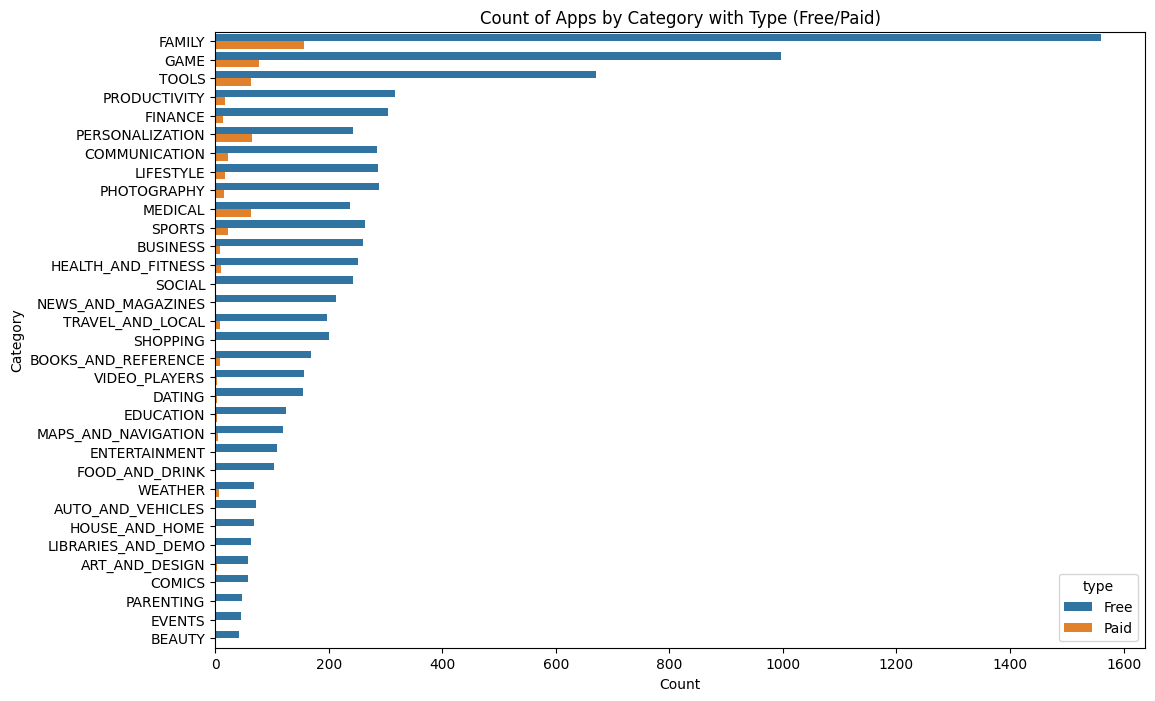

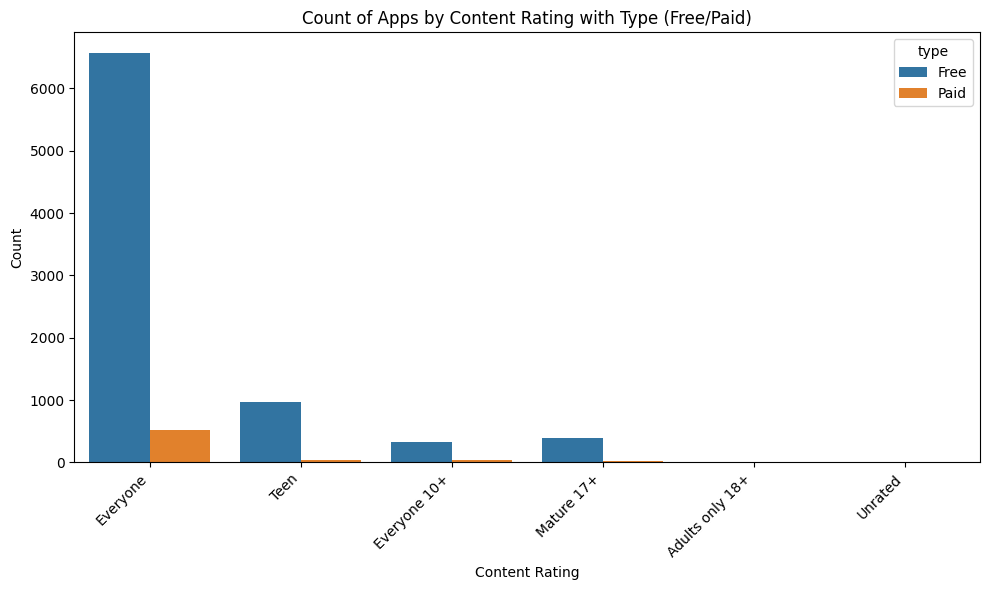

In [ ]:
# Example 1: Count of Apps by Category with Type as Hue
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='category', hue='type', order=df['category'].value_counts().index)
plt.title('Count of Apps by Category with Type (Free/Paid)')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Example 2: Count of Apps by Content Rating with Type as Hue
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='content_rating', hue='type')
plt.title('Count of Apps by Content Rating with Type (Free/Paid)')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Now let's perform multivariate analysis

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by focusing on the colors:

Find the Hotspots (The Darkest/Brightest Colors): Look for the most intense colors on the map. These cells represent the strongest relationships between two factors. For example, "The dark red square shows that 'customer satisfaction' and 'customer loyalty' are very strongly linked."

Understand the Colors (Positive vs. Negative Trends): Pay attention to the color legend. One color (e.g., red) will mean a positive relationship (when one factor goes up, the other also tends to go up). Another color (e.g., blue) will mean a negative relationship (when one goes up, the other tends to go down).

Spot What's Unrelated (The Neutral/Lightest Colors): The pale, neutral-colored cells represent weak or no relationship. This is useful for knowing which factors operate independently of each other.

### Technical Analysis (For Modeling) 🔬
For a technical audience, analyze the correlation matrix and its implications:

Quantifying Correlation: The heatmap visualizes the correlation matrix. Each cell displays the correlation coefficient (e.g., Pearson's r) between two variables. The primary task is to identify pairs with high positive (close to +1) or high negative (close to -1) correlations.

Detecting Multicollinearity: This is the most critical use case. Look for high correlation values between pairs of independent (predictor) variables. A high coefficient (e.g., an absolute value greater than 0.7) is a strong indicator of multicollinearity, which can destabilize linear models and must be handled (e.g., through feature removal, VIF analysis, or regularization).

Feature Selection Insights: Systematically examine the row or column corresponding to your target variable. Features exhibiting a high correlation with the target are strong candidates for inclusion in a predictive model. Conversely, features with correlations near zero may be less useful.



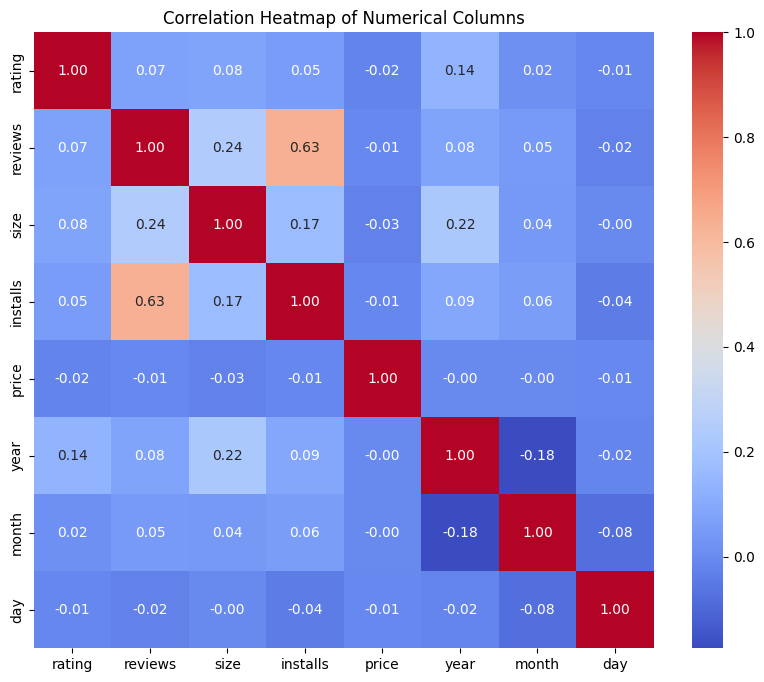

In [ ]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### Business Summary (The "So What?") 📈
For a non-technical audience, craft a simple narrative by comparing the different colored trend lines:

Compare the Trends for Each Group (Direction of Lines): Look at the different colored lines. Do they all go in the same general direction? This tells you if the relationship between the two main factors is the same for all segments. For example, "For both 'New' and 'Returning' customers, satisfaction increases with faster delivery times."

Compare the Relationship's Impact (Steepness of Lines): Look at how steep each colored line is. A steep line means the relationship is very impactful for that group (a small change in one factor leads to a big change in the other). A flatter line indicates a weaker impact for that group.

Spot a Change in Leadership (Intersecting Lines): This is a key insight. If the lines cross, it means which group is "better" depends on the context. For example, "At a low price, 'Product A' sells more, but once the price increases past $50, 'Product B' starts to sell more."

### Technical Analysis (For Modeling) 🔬
For a technical audience, analyze the interaction between the variables:

Visualizing Interaction Effects: This is the plot's primary purpose. It visualizes a potential interaction term between a numerical predictor (x-axis) and a categorical predictor (hue). If the slopes of the regression lines are noticeably different across the hue categories, it is strong evidence of an interaction effect that would be valuable to include in a linear model.

Comparing Conditional Regression Coefficients: By visually comparing the slopes and intercepts of the different colored lines, you can form hypotheses about how the categorical variable moderates the relationship between the two numerical variables. For example, parallel lines suggest the hue variable primarily affects the intercept, while lines with different slopes suggest it primarily affects the coefficient of the x-variable.

Assessing Model Assumptions per Subgroup: The plot allows for a visual check of linear regression assumptions (e.g., linearity, homoscedasticity) for each subgroup separately. You might find that a linear fit is appropriate for one category but not for another, or that one group exhibits heteroscedasticity while others do not, guiding more nuanced model development.

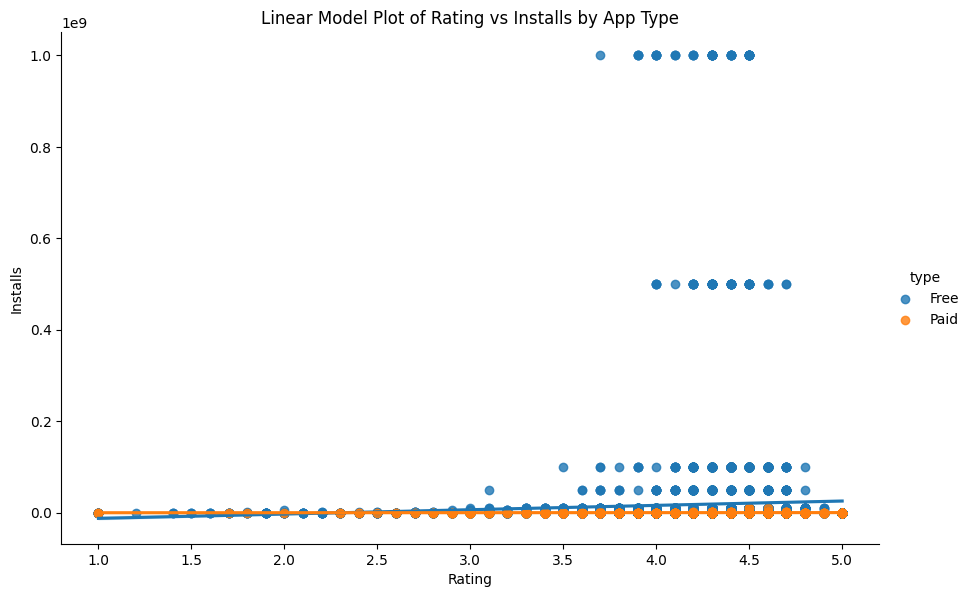

In [ ]:
sns.lmplot(data=df, x='rating', y='installs', hue='type', height=6, aspect=1.5)
plt.title('Linear Model Plot of Rating vs Installs by App Type')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()



***

### **Univariate Analysis**

This analysis focuses on describing and summarizing a **single** variable.

| Plot Type | Variable Type(s) | Primary Goal | Analysis Category |
| :--- | :--- | :--- | :--- |
| **Histplot** | 1 Numerical | Show frequency distribution | Univariate (Numerical) |
| **Box plot** | 1 Numerical | Show five-number summary & outliers | Univariate (Numerical) |
| **Violin plot** | 1 Numerical | Show probability density & summary | Univariate (Numerical) |
| **Count plot** | 1 Categorical | Show frequency of each category | Univariate (Categorical) |
| **Pie plot** | 1 Categorical | Show proportion of each category | Univariate (Categorical) |

***

### **Bivariate Analysis**

This analysis explores the relationship between **two** variables.

| Plot Type | Variable Type(s) | Primary Goal | Analysis Category |
| :--- | :--- | :--- | :--- |
| **Regression Plot** | 2 Numerical | Show linear relationship and correlation | Bivariate (Num-Num) |
| **Pair Plot** | 2+ Numerical | Visualize all pairwise relationships | Bivariate (Num-Num) |
| **Countplot (with hue)**| 2 Categorical | Compare frequency across two categories | Bivariate (Cat-Cat) |
| **Bar Plot** | 1 Numerical, 1 Categorical | Compare a numerical aggregate across categories | Bivariate (Num-Cat) |
| **Box Plot** | 1 Numerical, 1 Categorical | Compare numerical distributions across categories | Bivariate (Num-Cat) |
| **Violin Plot** | 1 Numerical, 1 Categorical | Compare probability densities across categories | Bivariate (Num-Cat) |
| **Swarm Plot** | 1 Numerical, 1 Categorical | Show all data points in distributions by category | Bivariate (Num-Cat) |
| **Boxen Plot** | 1 Numerical, 1 Categorical | Compare distributions with more detail in the tails | Bivariate (Num-Cat) |

***

### **Multivariate Analysis**

This analysis examines the relationships between **three or more** variables simultaneously.

| Plot Type | Variable Type(s) | Primary Goal | Analysis Category |
| :--- | :--- | :--- | :--- |
| **Lmplot (with hue)** | 2 Numerical, 1 Categorical | Compare regression lines across different categories | Multivariate |
| **Heatmap** | Multiple Numerical | Visualize magnitude in a matrix (e.g., correlation) | Multivariate |